In [1]:
import numpy as np
import random
import os
def seed_everything(seed: int = 24):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
seed_everything(24)

import pandas as pd
import sklearn
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import train_test_split as tts
from bayes_opt import BayesianOptimization
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE

In [2]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PolynomialFeatures

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('train_0208_3.csv')
test = pd.read_csv('test_0208_3.csv')

In [4]:
train.shape, test.shape  

((59299, 29), (5271, 29))

In [7]:
def split_dataframe_by_bool(train, test):          #라벨에 따라 분리
    
    # Splitting the train dataframe
    train1 = train[train['is_converted'] == True].copy()
    train0 = train[train['is_converted'] == False].copy()

    # Splitting the test dataframe
    test1 = test[test['is_converted'] == True].copy()
    test0 = test[test['is_converted'] == False].copy()

    return train1, train0 

train1,train0 =split_dataframe_by_bool(train, test)

In [8]:
train1.shape, train0.shape  

((4850, 29), (54449, 29))

# train test 전격 비교

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   bant_submit                        59299 non-null  float64
 1   customer_country                   59299 non-null  object 
 2   business_unit                      59299 non-null  object 
 3   com_reg_ver_win_rate               59299 non-null  float64
 4   customer_idx                       59299 non-null  int64  
 5   customer_type                      59299 non-null  object 
 6   enterprise                         59299 non-null  object 
 7   id_strategic_ver                   59299 non-null  float64
 8   it_strategic_ver                   59299 non-null  float64
 9   idit_strategic_ver                 59299 non-null  float64
 10  lead_desc_length                   59299 non-null  float64
 11  product_category                   59299 non-null  obj

In [22]:
def plot_categorical_distribution(df1, df2, column_name):                 #시각화 함수 정의 
   
    # Convert to categorical if necessary and calculate proportions
    if df1[column_name].dtype in ['float64', 'int64']:
        df1[column_name] = pd.Categorical(df1[column_name].astype(str))
        df2[column_name] = pd.Categorical(df2[column_name].astype(str))

    proportion_df1 = df1[column_name].value_counts(normalize=True).rename_axis(column_name).reset_index(name='proportion')
    proportion_df2 = df2[column_name].value_counts(normalize=True).rename_axis(column_name).reset_index(name='proportion')

    # Plotting
    fig, axes = plt.subplots(1, 2, figsize=(14, 8), sharey=True)
    sns.barplot(x='proportion', y=column_name, data=proportion_df1, ax=axes[0], palette='viridis').set(xlim=(0, 1))
    sns.barplot(x='proportion', y=column_name, data=proportion_df2, ax=axes[1], palette='viridis').set(xlim=(0, 1))

    axes[0].set_title(f'train: {column_name}')
    axes[1].set_title(f'test: {column_name}')
    plt.tight_layout()

    # Ensure the y-axis labels are readable and x-axis labels show proportions
    for ax in axes:
        ax.set_xlabel('Proportion')
        ax.tick_params(axis='y', labelsize=10)

    plt.show()


## bant_submit 

# 확인필요!

C:\Users\ParkJunHyeong\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\ParkJunHyeong\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


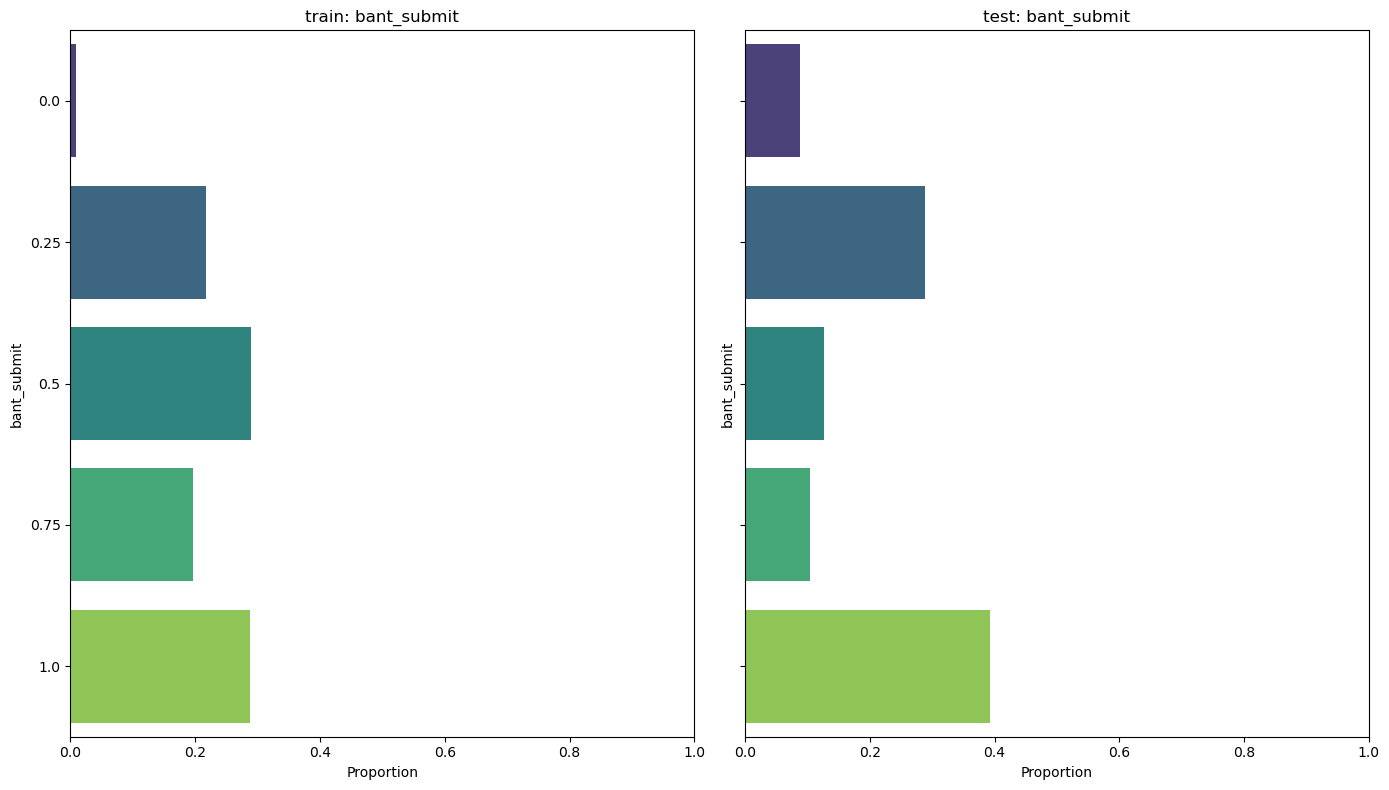

In [23]:
plot_categorical_distribution(train, test, "bant_submit")

C:\Users\ParkJunHyeong\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\ParkJunHyeong\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


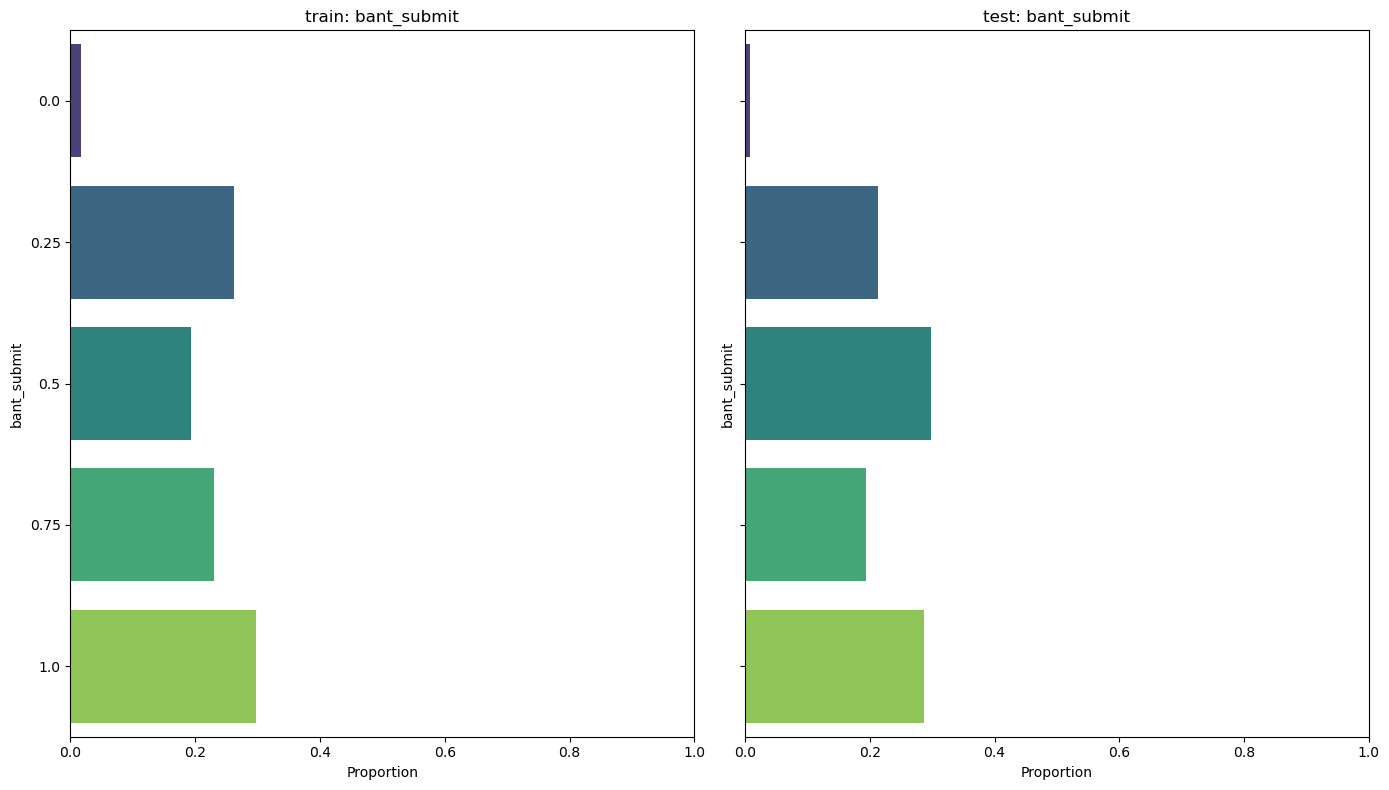

In [24]:
plot_categorical_distribution(train1,train0, "bant_submit")

## business_unit

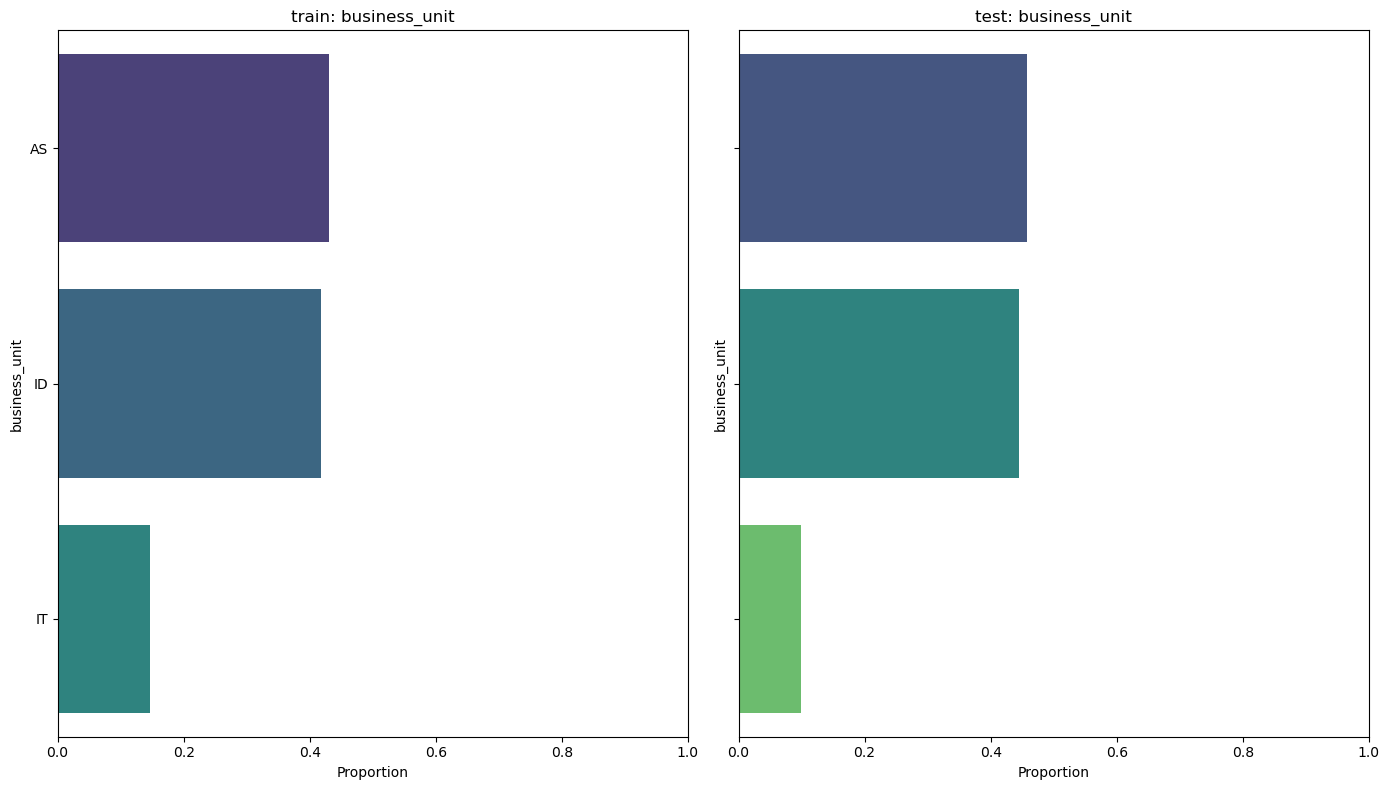

In [25]:
plot_categorical_distribution(train, test, "business_unit")

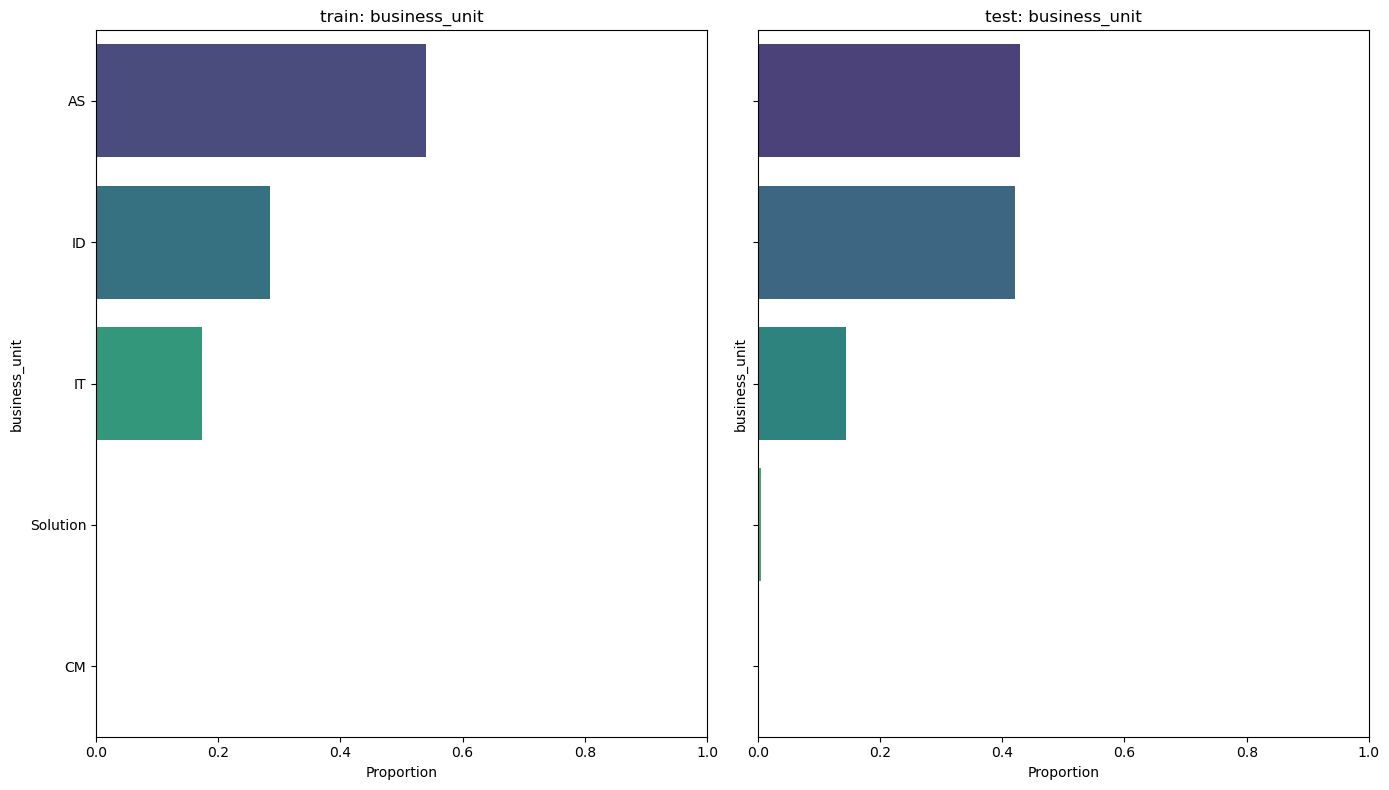

In [26]:
plot_categorical_distribution(train1,train0, "business_unit")

## customer_type_category	

# 확인 필요!

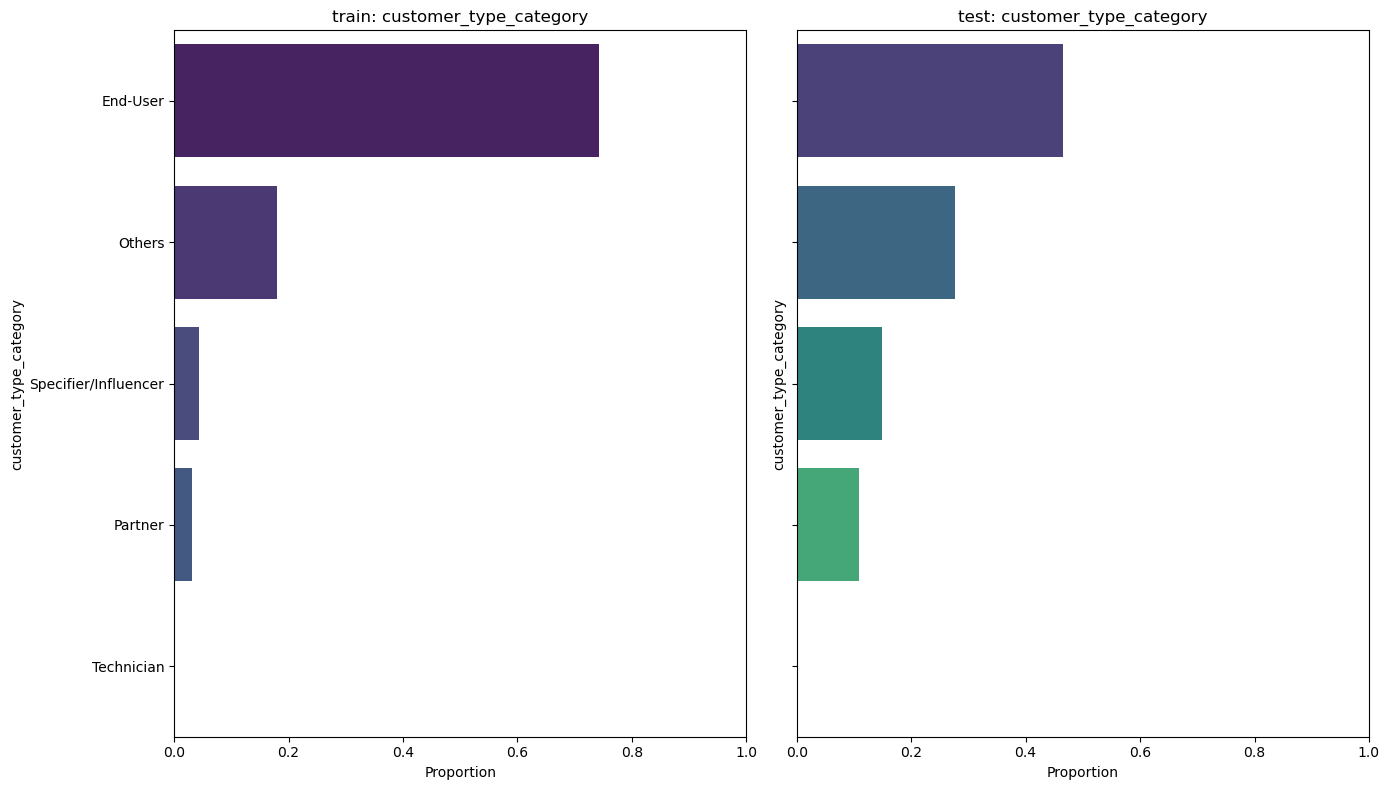

In [27]:
plot_categorical_distribution(train, test, "customer_type_category")

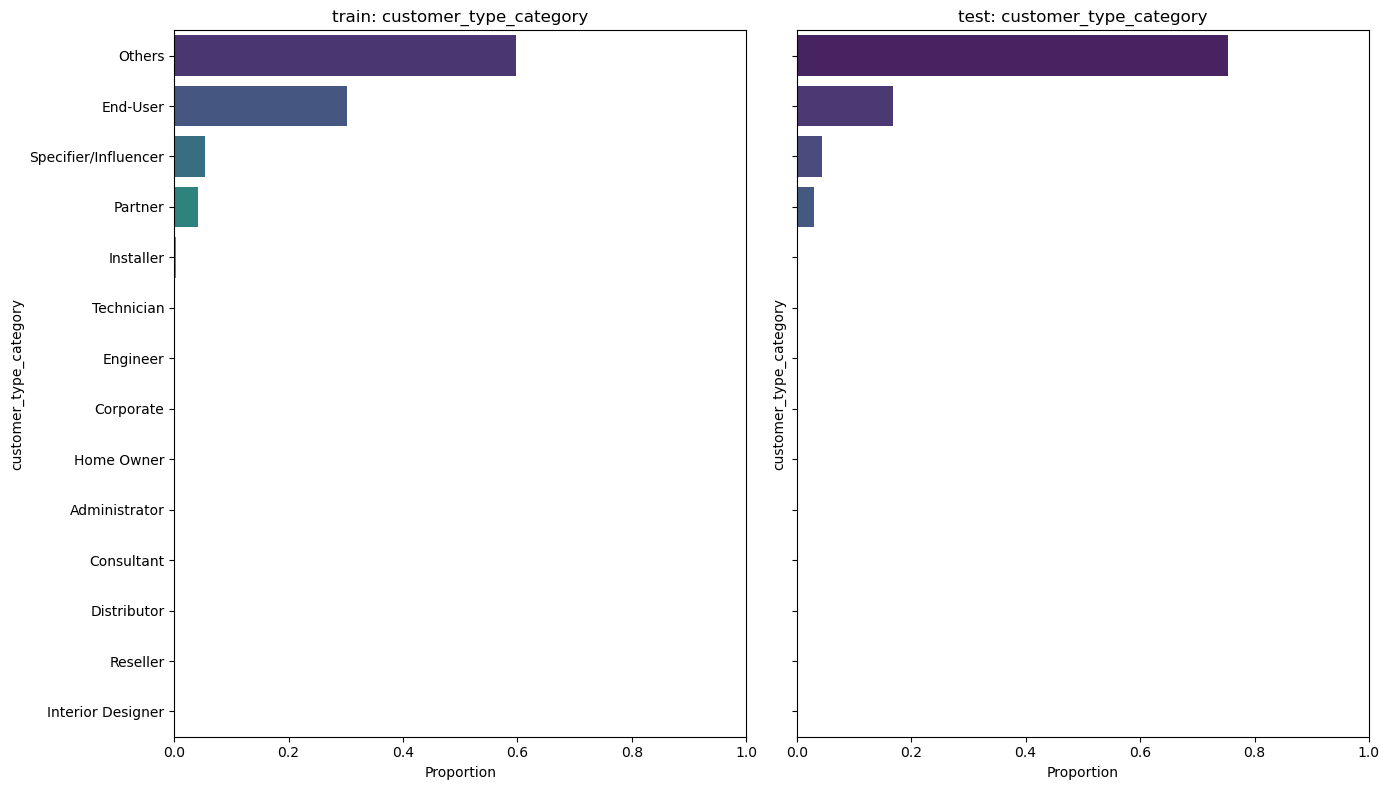

In [28]:
plot_categorical_distribution(train1,train0, "customer_type_category")

## enterprise

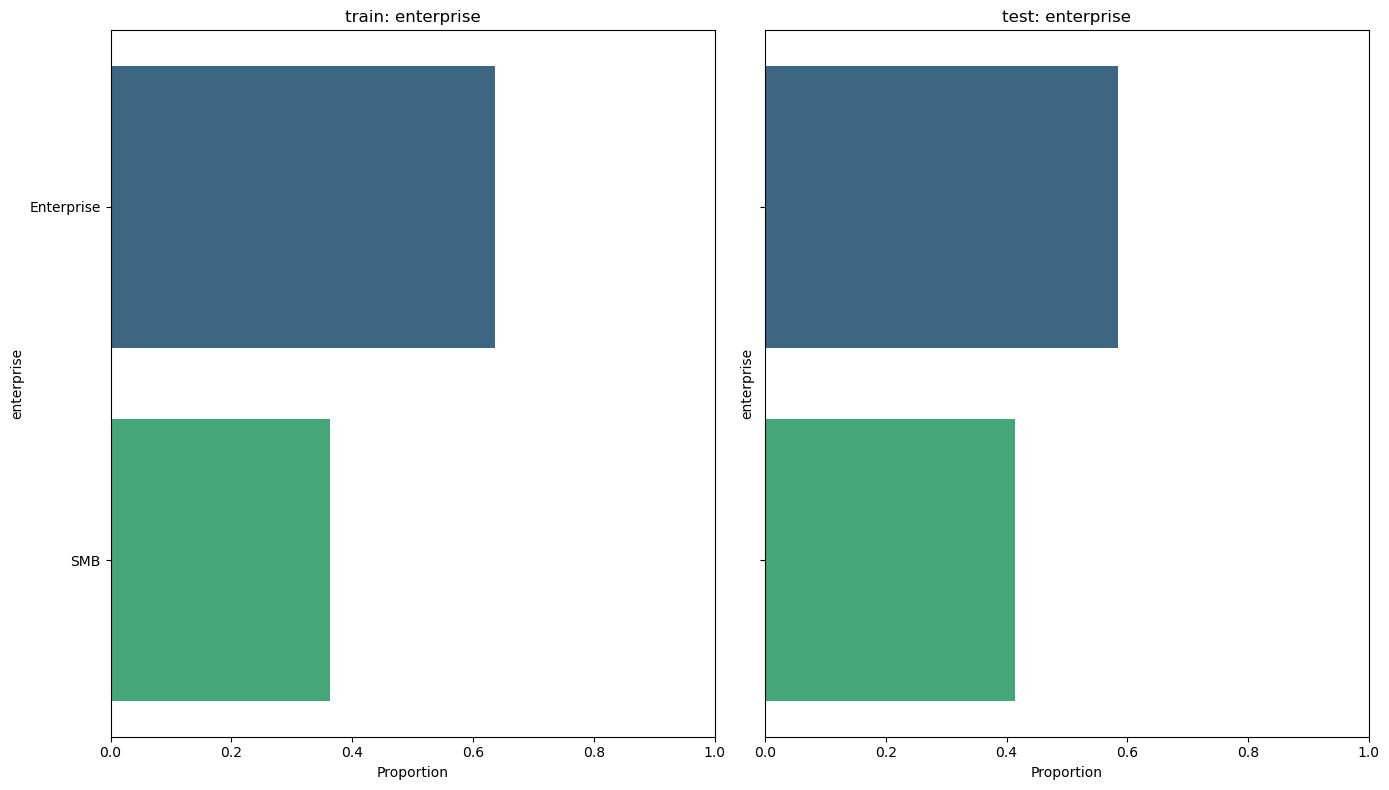

In [29]:
plot_categorical_distribution(train, test, "enterprise")

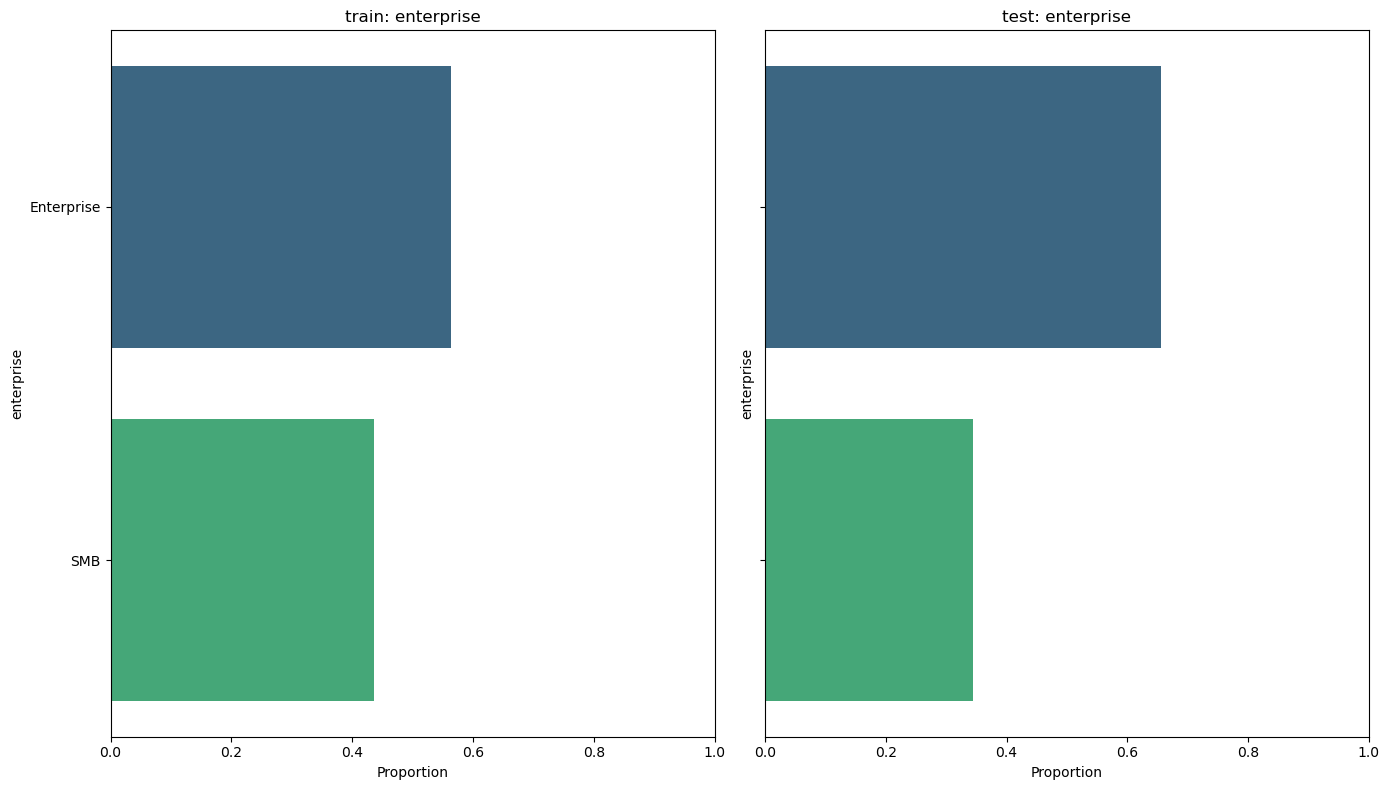

In [30]:
plot_categorical_distribution(train1,train0, "enterprise")

## id_strategic_ver

C:\Users\ParkJunHyeong\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\ParkJunHyeong\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


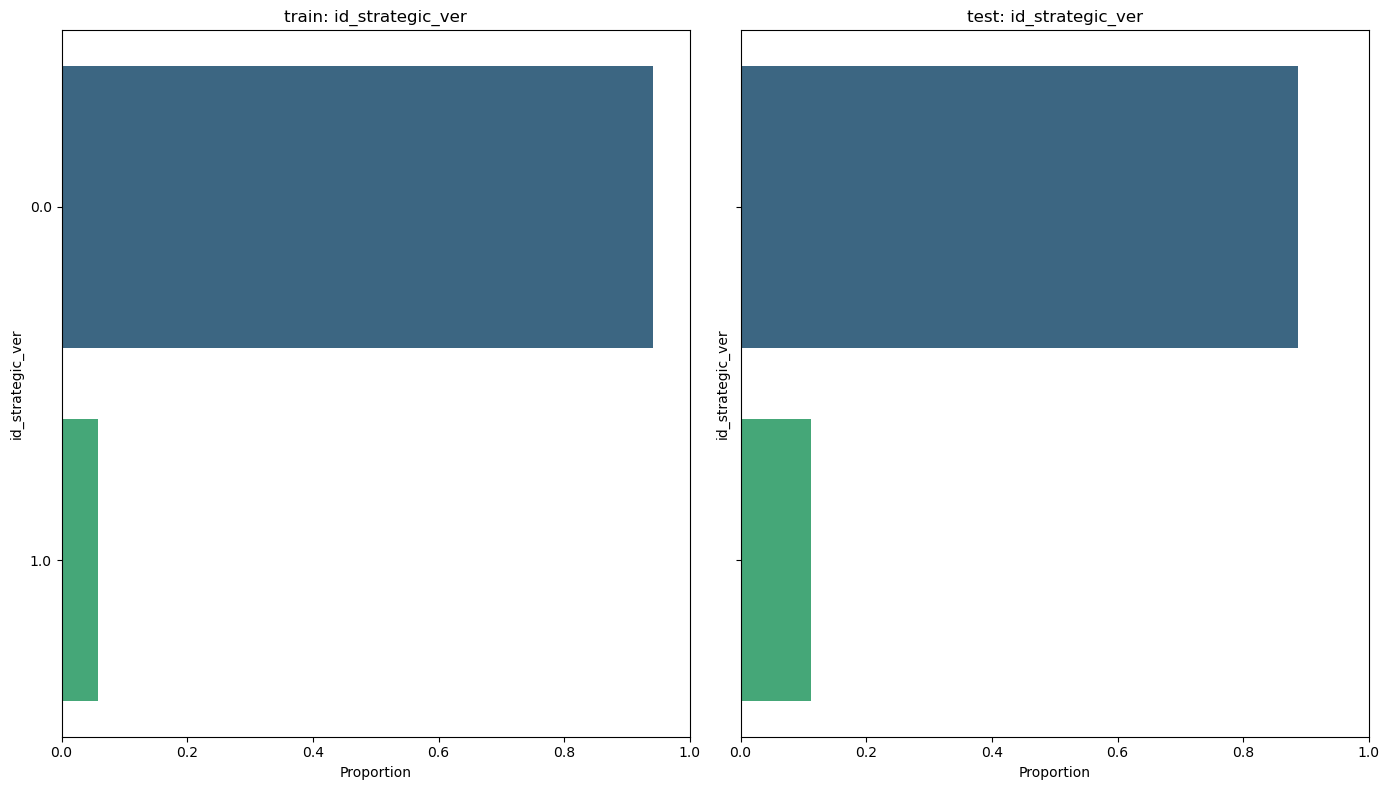

In [31]:
plot_categorical_distribution(train, test, "id_strategic_ver")

C:\Users\ParkJunHyeong\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\ParkJunHyeong\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


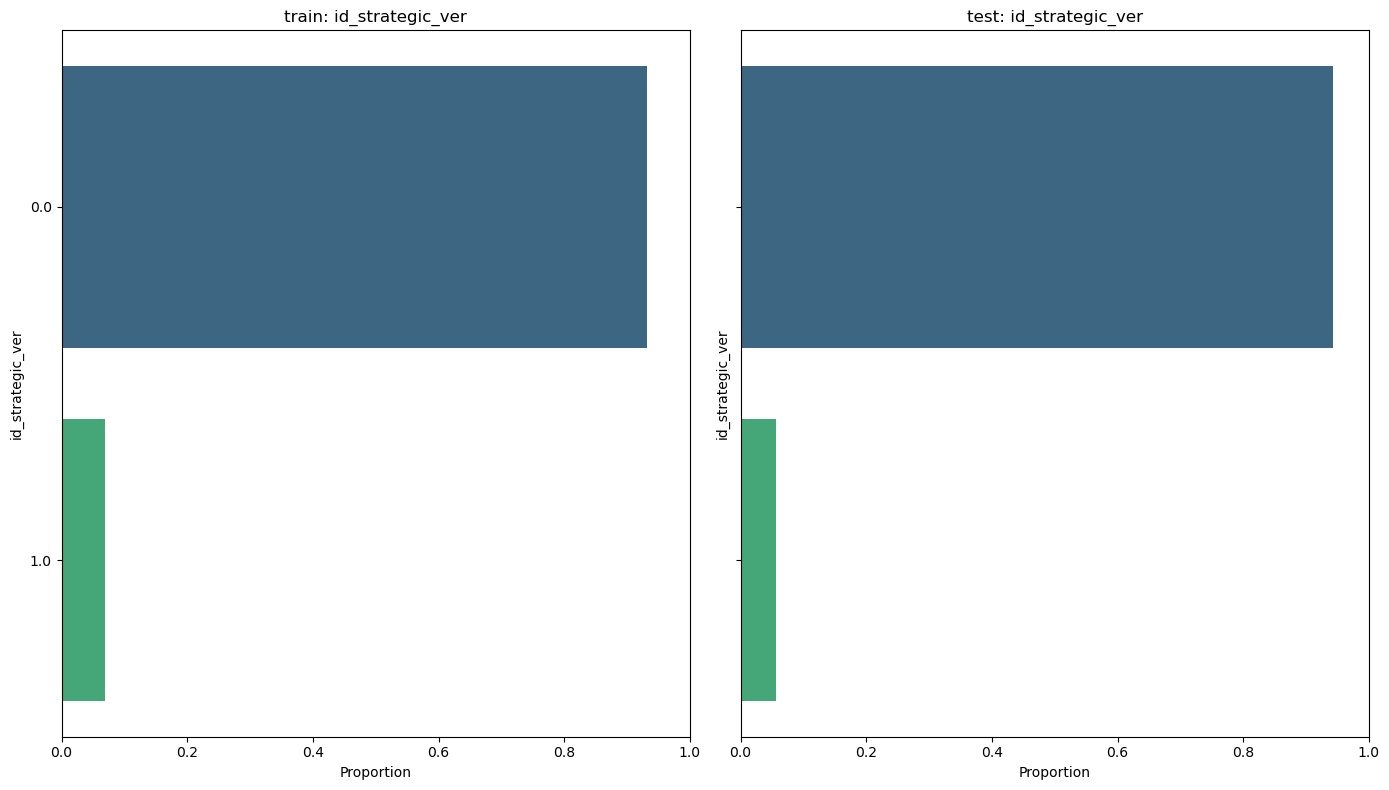

In [32]:
plot_categorical_distribution(train1,train0, "id_strategic_ver")

## it_strategic_ver

In [33]:
train1["it_strategic_ver"].value_counts()

it_strategic_ver
0.0    4837
1.0      13
Name: count, dtype: int64

C:\Users\ParkJunHyeong\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\ParkJunHyeong\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


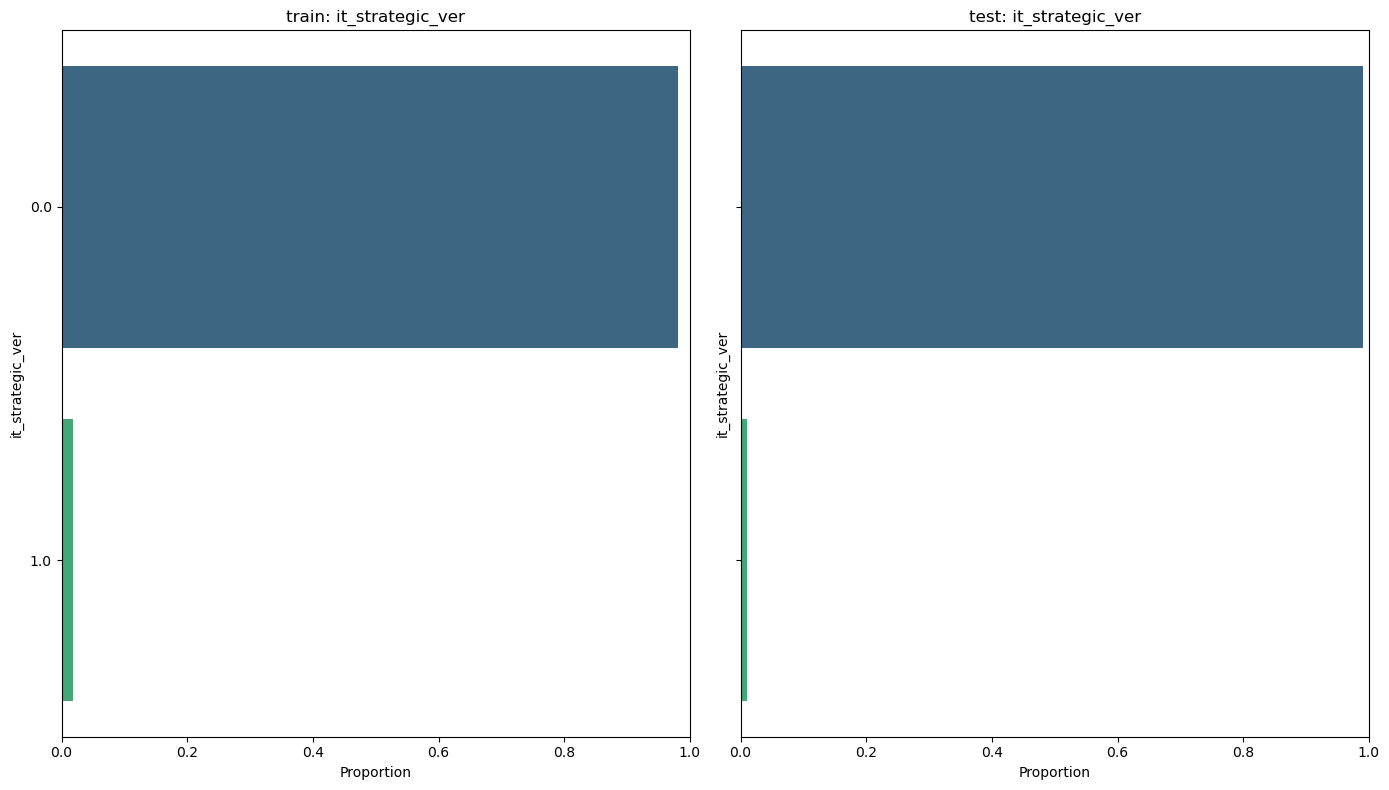

In [34]:
plot_categorical_distribution(train, test, "it_strategic_ver")

In [82]:
train1["it_strategic_ver"].value_counts()       #사업부가 it이면 전환된사람이 오직 13명

it_strategic_ver
0.0    4837
1.0      13
Name: count, dtype: int64

C:\Users\ParkJunHyeong\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\ParkJunHyeong\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


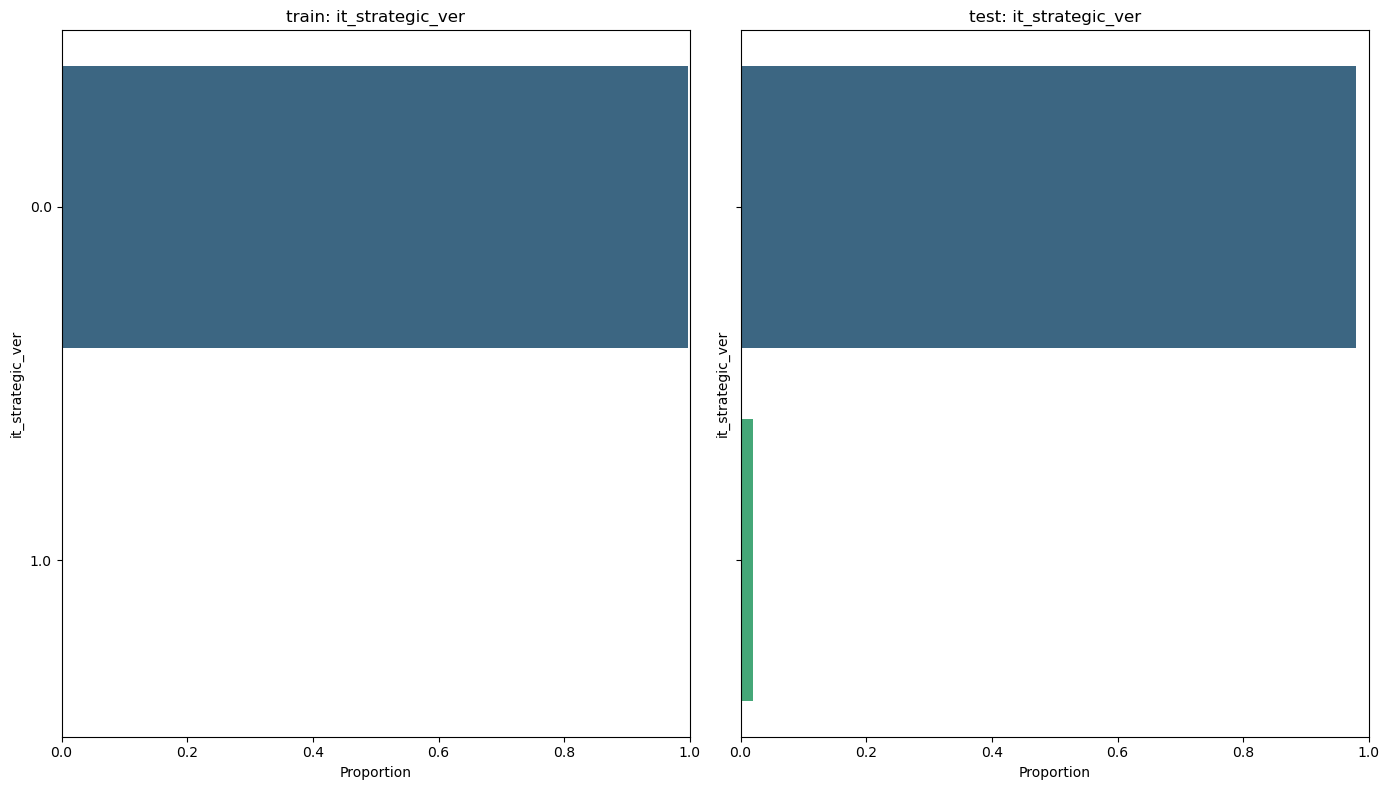

In [35]:
plot_categorical_distribution(train1,train0, "it_strategic_ver")

## idit_strategic_ver

C:\Users\ParkJunHyeong\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\ParkJunHyeong\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


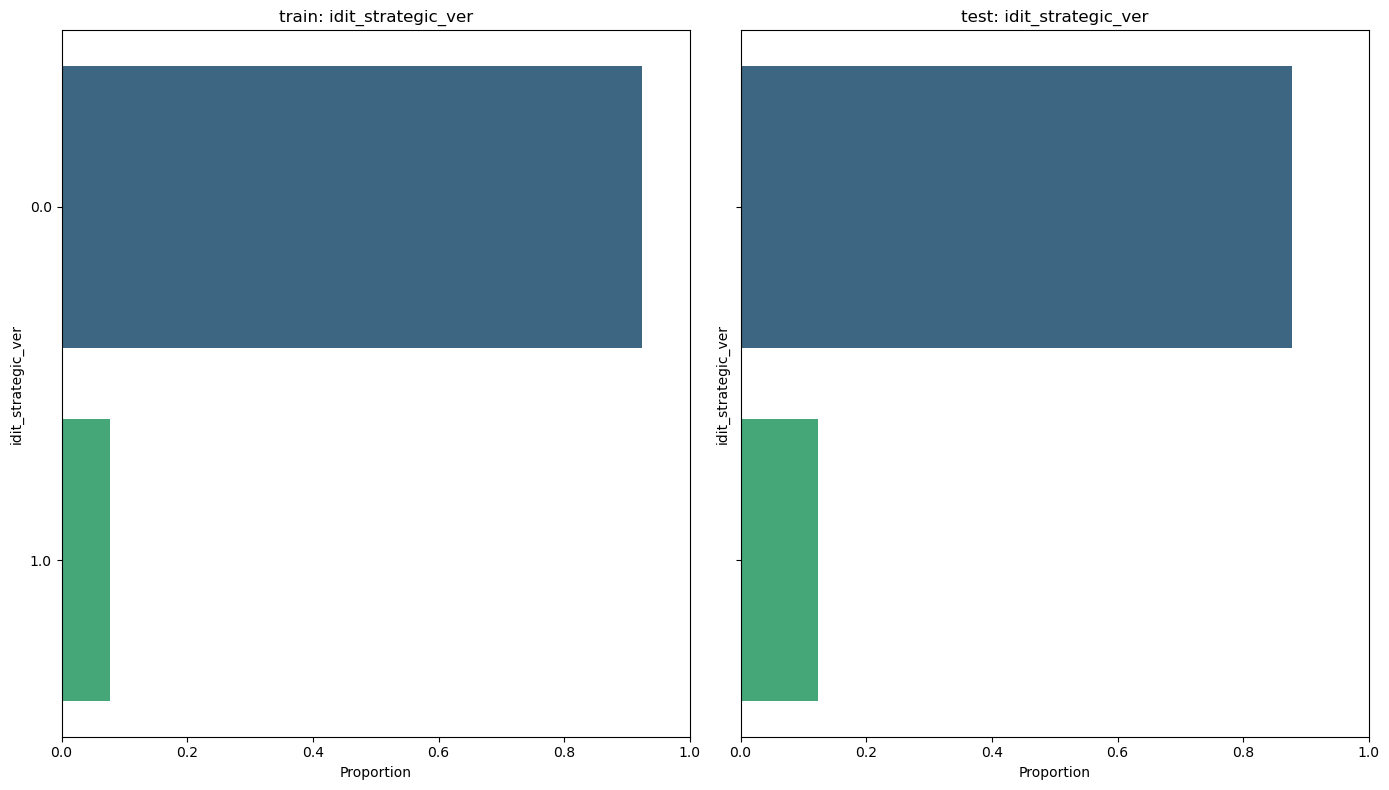

In [36]:
plot_categorical_distribution(train, test, "idit_strategic_ver")

C:\Users\ParkJunHyeong\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\ParkJunHyeong\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


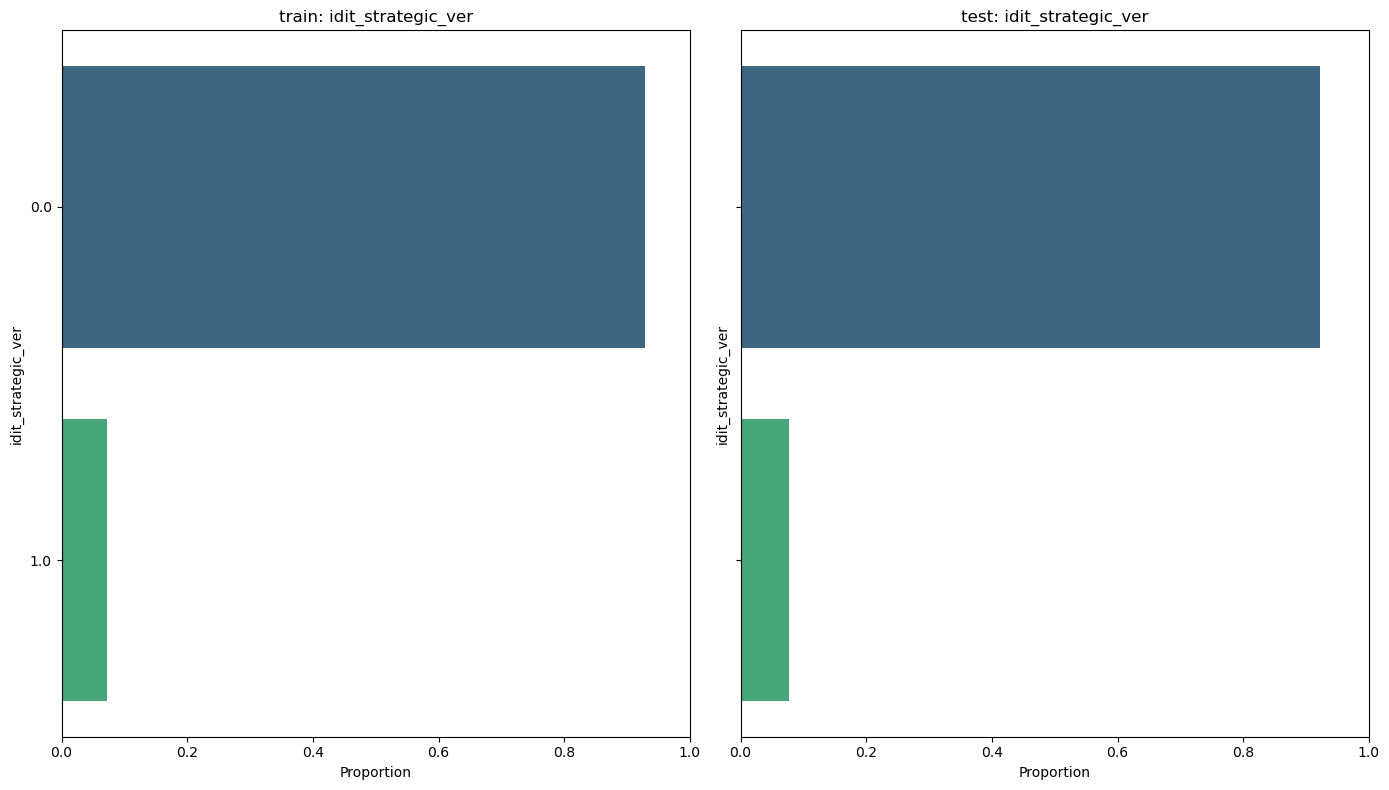

In [37]:
plot_categorical_distribution(train1,train0, "idit_strategic_ver")

## product_category

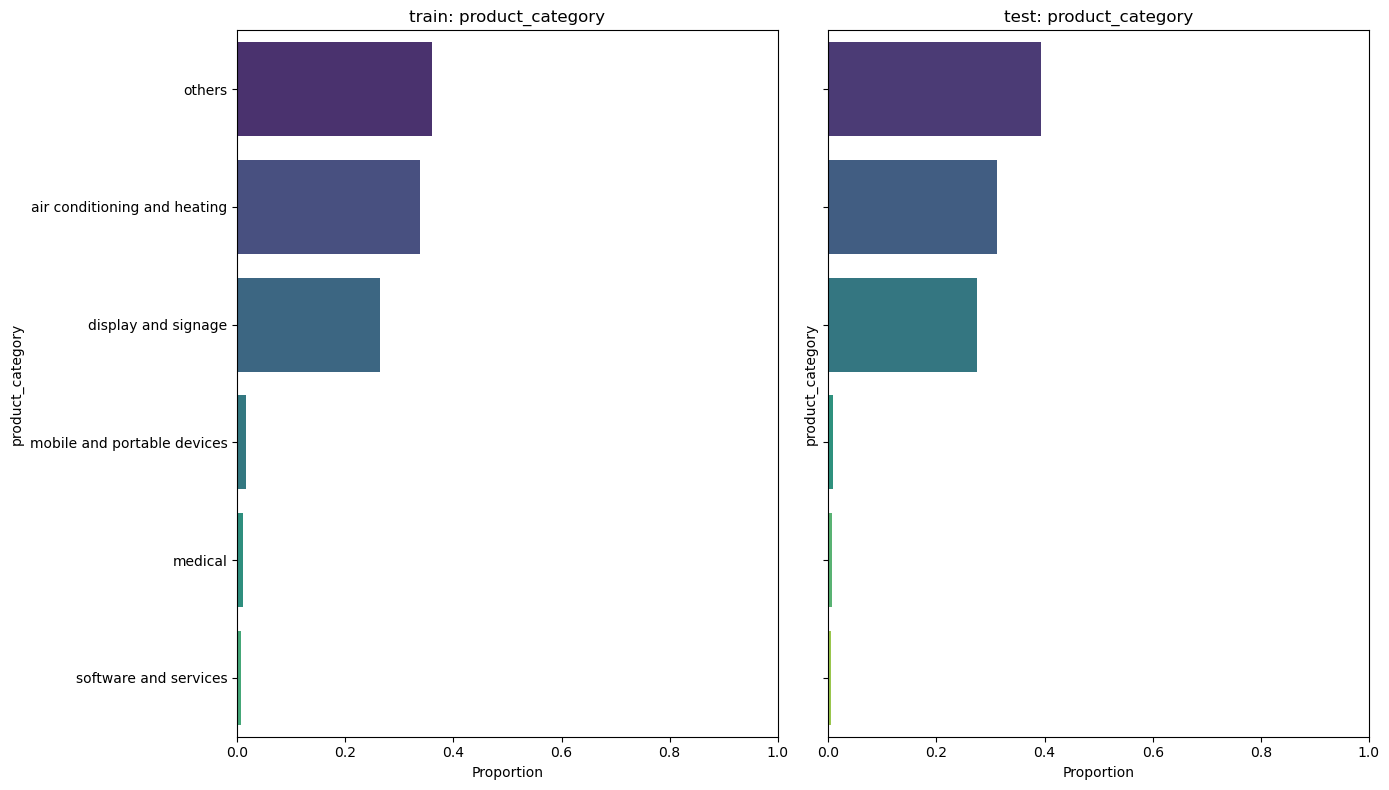

In [38]:
plot_categorical_distribution(train, test, "product_category")

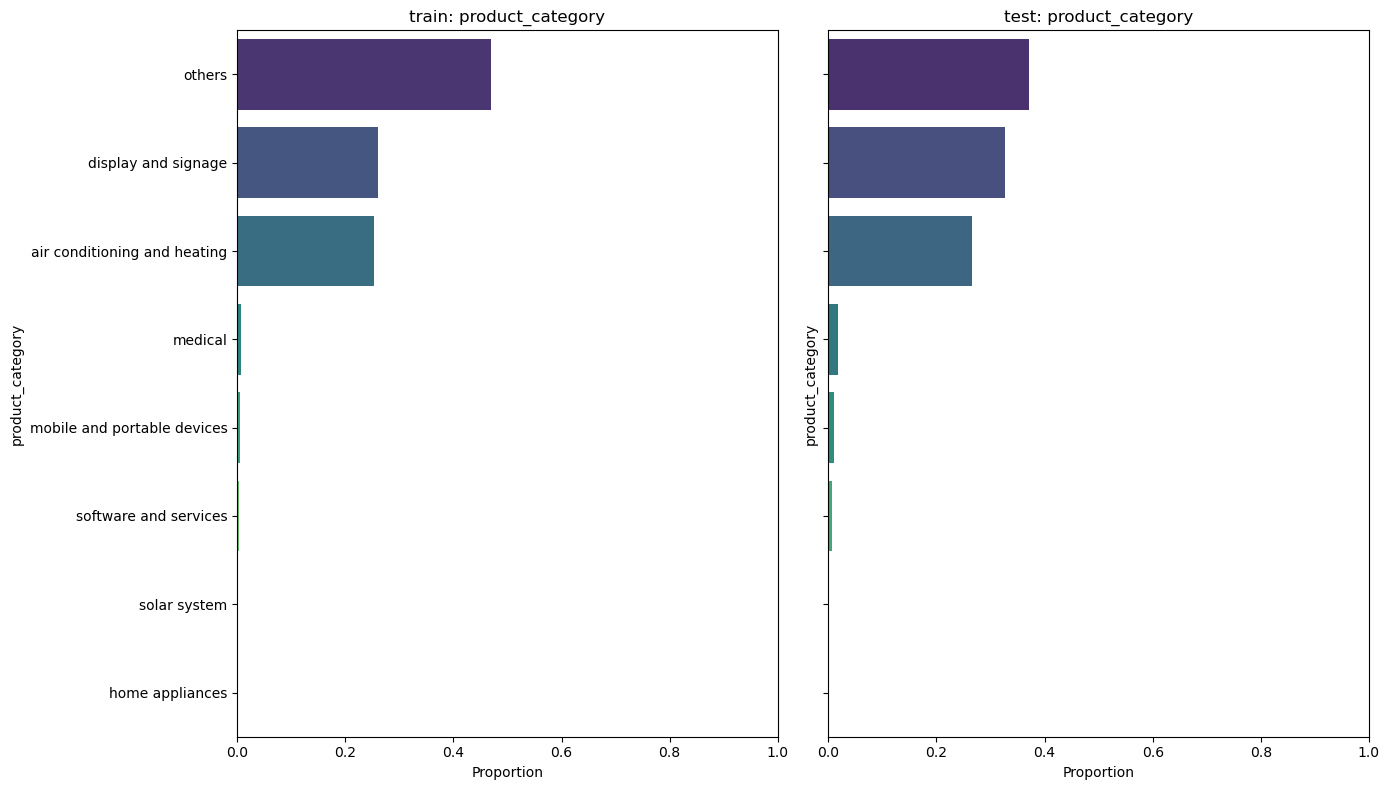

In [39]:
plot_categorical_distribution(train1,train0, "product_category")

In [86]:
test["product_category"].value_counts()

product_category
others                          2070
air conditioning and heating    1646
display and signage             1452
mobile and portable devices       50
medical                           32
software and services             21
Name: count, dtype: int64

In [83]:
train1["product_category"].value_counts()

product_category
display and signage             2278
others                          1267
air conditioning and heating    1225
software and services             35
mobile and portable devices       24
medical                           19
home appliances                    2
Name: count, dtype: int64

In [84]:
train0["product_category"].value_counts()

product_category
others                          20160
display and signage             17810
air conditioning and heating    14486
medical                           992
mobile and portable devices       592
software and services             363
solar system                       34
home appliances                    12
Name: count, dtype: int64

## expected_timeline

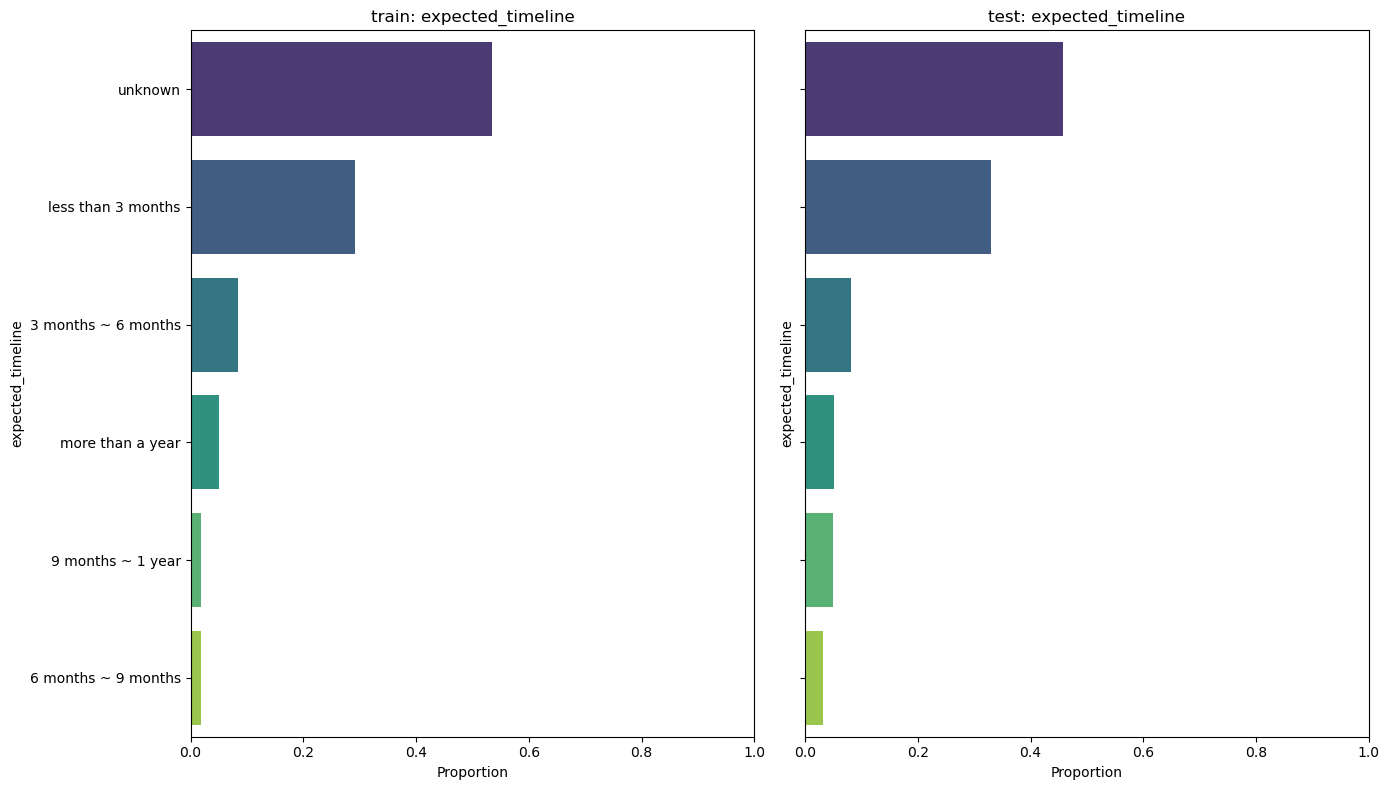

In [40]:
plot_categorical_distribution(train, test, "expected_timeline")

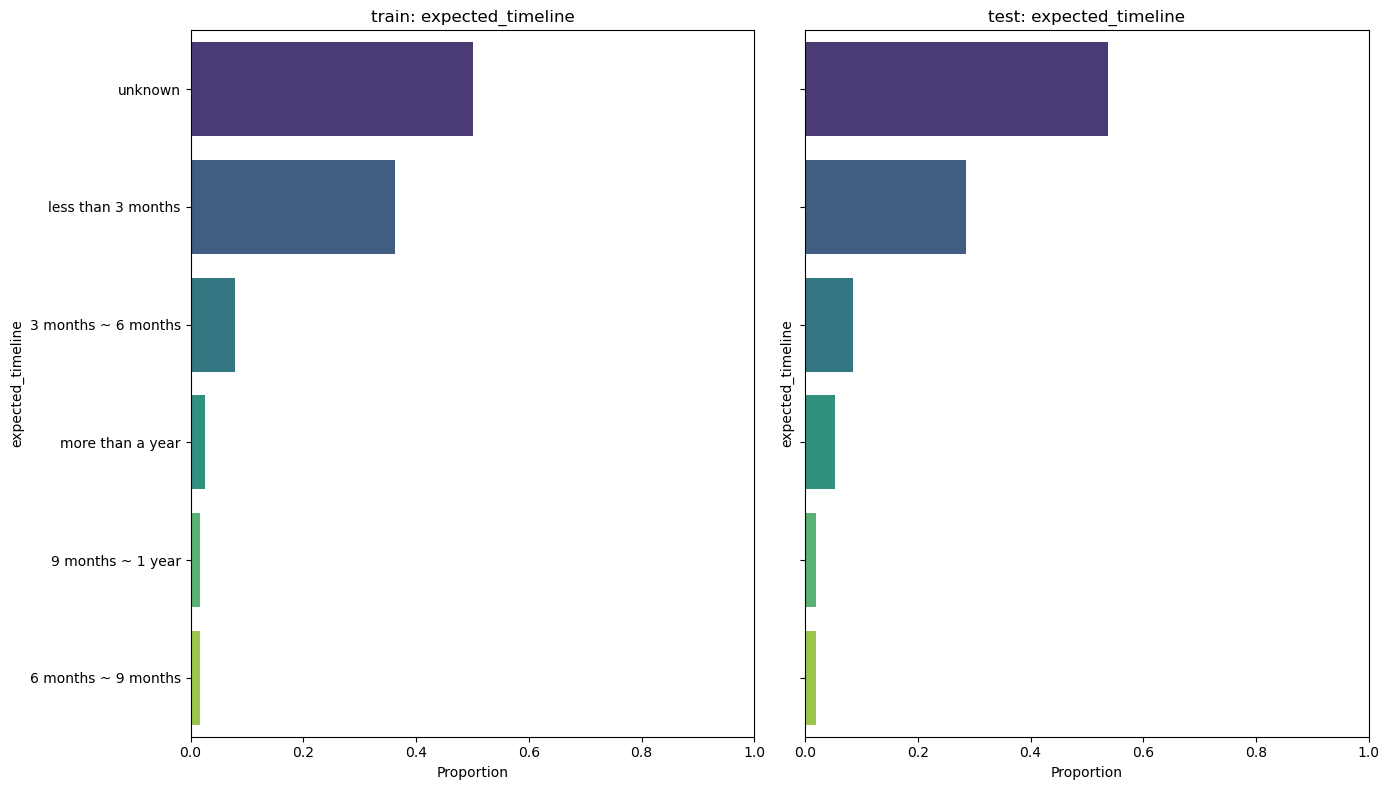

In [41]:
plot_categorical_distribution(train1,train0, "expected_timeline")

In [87]:
train1["expected_timeline"].value_counts()

expected_timeline
unknown                2427
less than 3 months     1755
3 months ~ 6 months     384
more than a year        124
6 months ~ 9 months      81
9 months ~ 1 year        79
Name: count, dtype: int64

In [88]:
train0["expected_timeline"].value_counts()

expected_timeline
unknown                29263
less than 3 months     15576
3 months ~ 6 months     4657
more than a year        2903
9 months ~ 1 year       1033
6 months ~ 9 months     1017
Name: count, dtype: int64

# 확인 필요!

## ver_cus

C:\Users\ParkJunHyeong\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\ParkJunHyeong\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


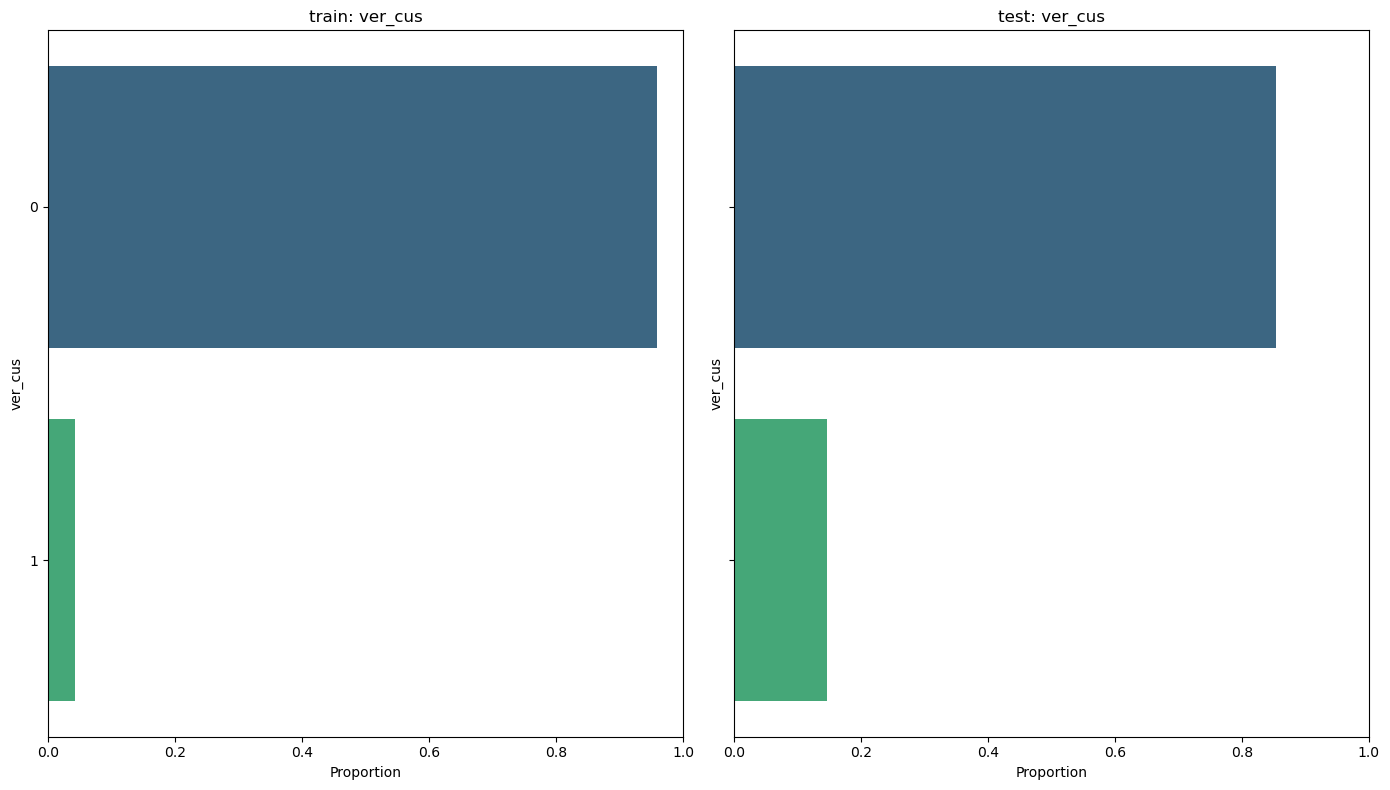

In [42]:
plot_categorical_distribution(train, test, "ver_cus")

C:\Users\ParkJunHyeong\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\ParkJunHyeong\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


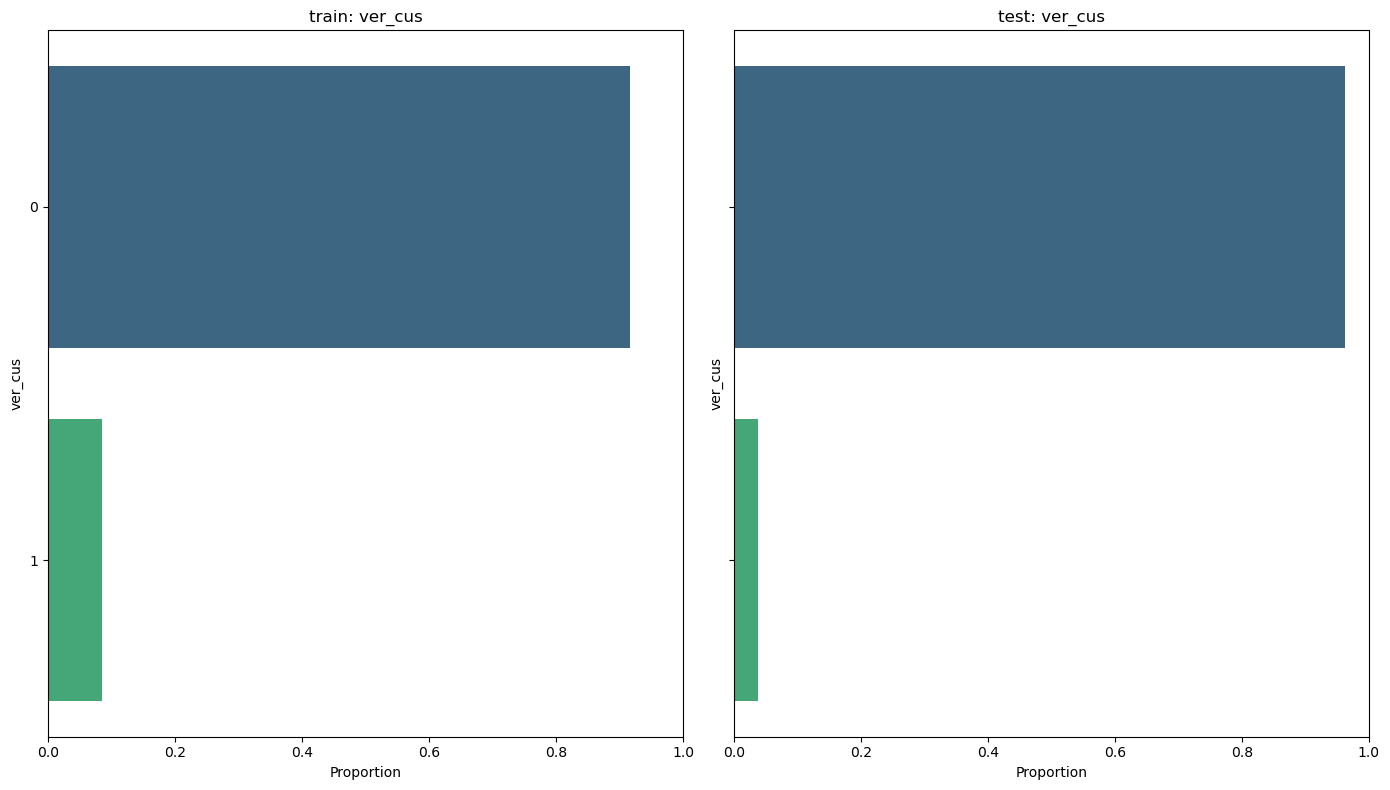

In [43]:
plot_categorical_distribution(train1,train0, "ver_cus")

In [91]:
train1["ver_cus"].value_counts()

ver_cus
0    4442
1     408
Name: count, dtype: int64

In [92]:
train0["ver_cus"].value_counts()

ver_cus
0    52390
1     2059
Name: count, dtype: int64

# 확인필요!

## ver_pro

C:\Users\ParkJunHyeong\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\ParkJunHyeong\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


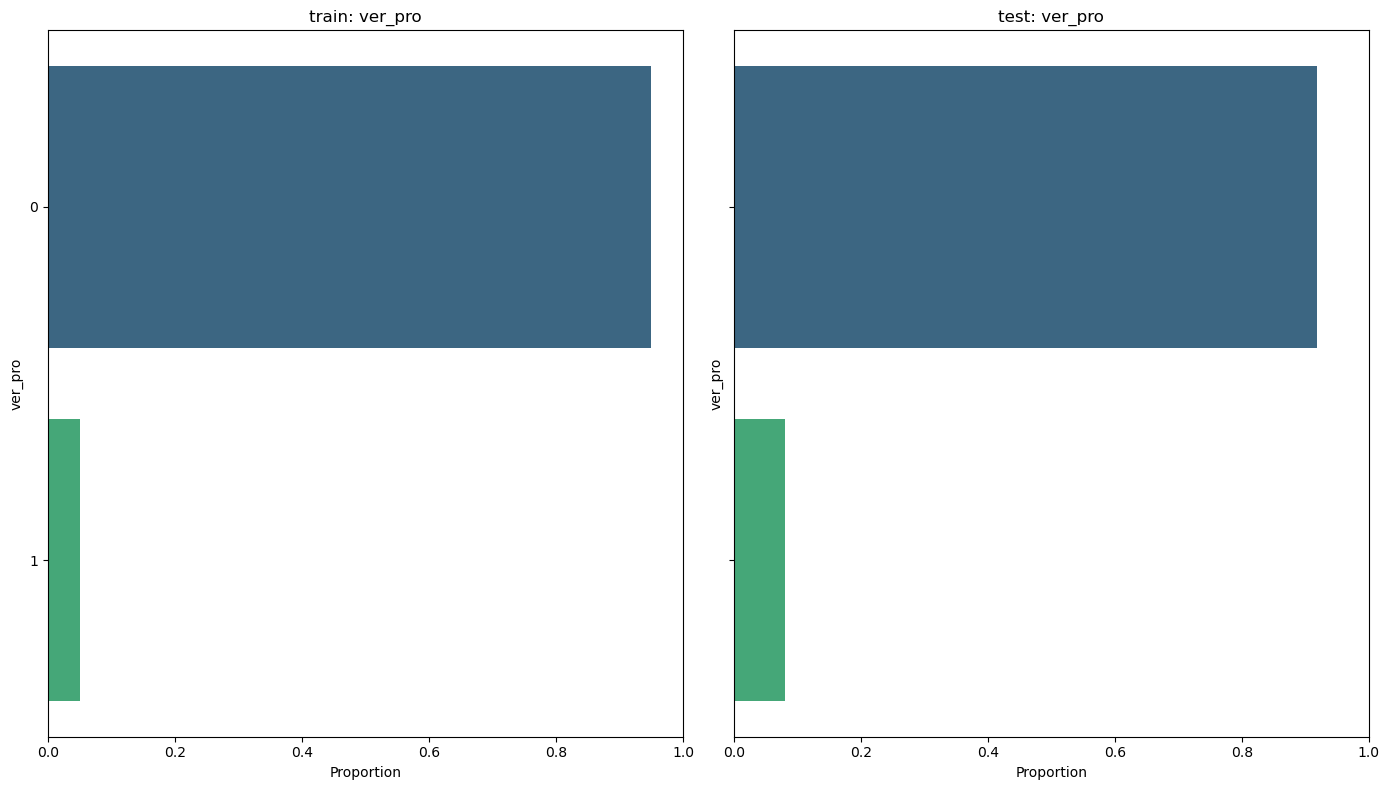

In [44]:
plot_categorical_distribution(train, test, "ver_pro")

C:\Users\ParkJunHyeong\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\ParkJunHyeong\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


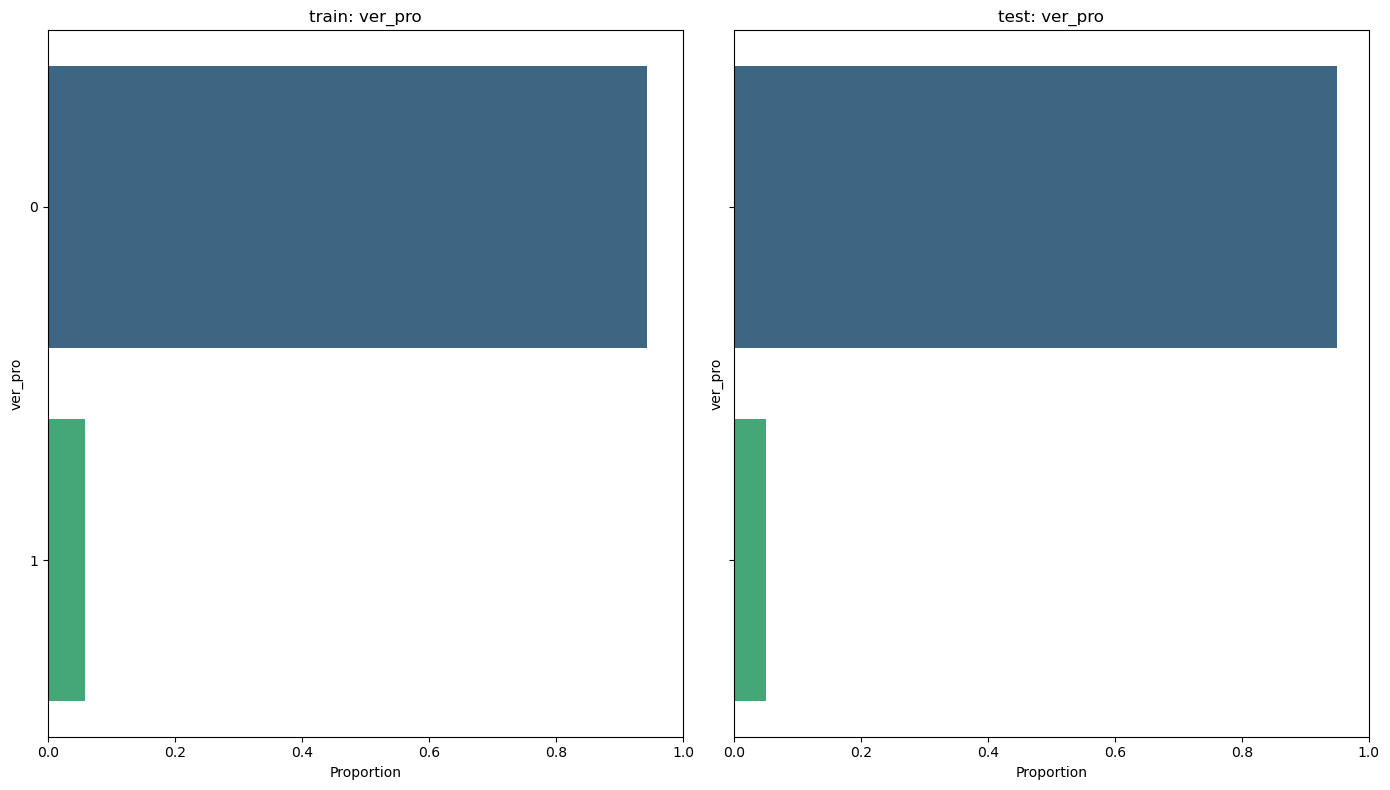

In [45]:
plot_categorical_distribution(train1,train0, "ver_pro")

In [89]:
train1["ver_pro"].value_counts()

ver_pro
0    4572
1     278
Name: count, dtype: int64

In [90]:
train0["ver_pro"].value_counts()

ver_pro
0    51714
1     2735
Name: count, dtype: int64

## ver_win_rate_x

In [46]:
#plot_categorical_distribution(train, test, "ver_win_rate_x")

## ver_win_ratio_per_bu

In [47]:
#plot_categorical_distribution(train, test, "ver_win_ratio_per_bu")

## lead_owner

In [48]:
#plot_categorical_distribution(train, test, "lead_owner")

# 확인 필요!

## customer_continent

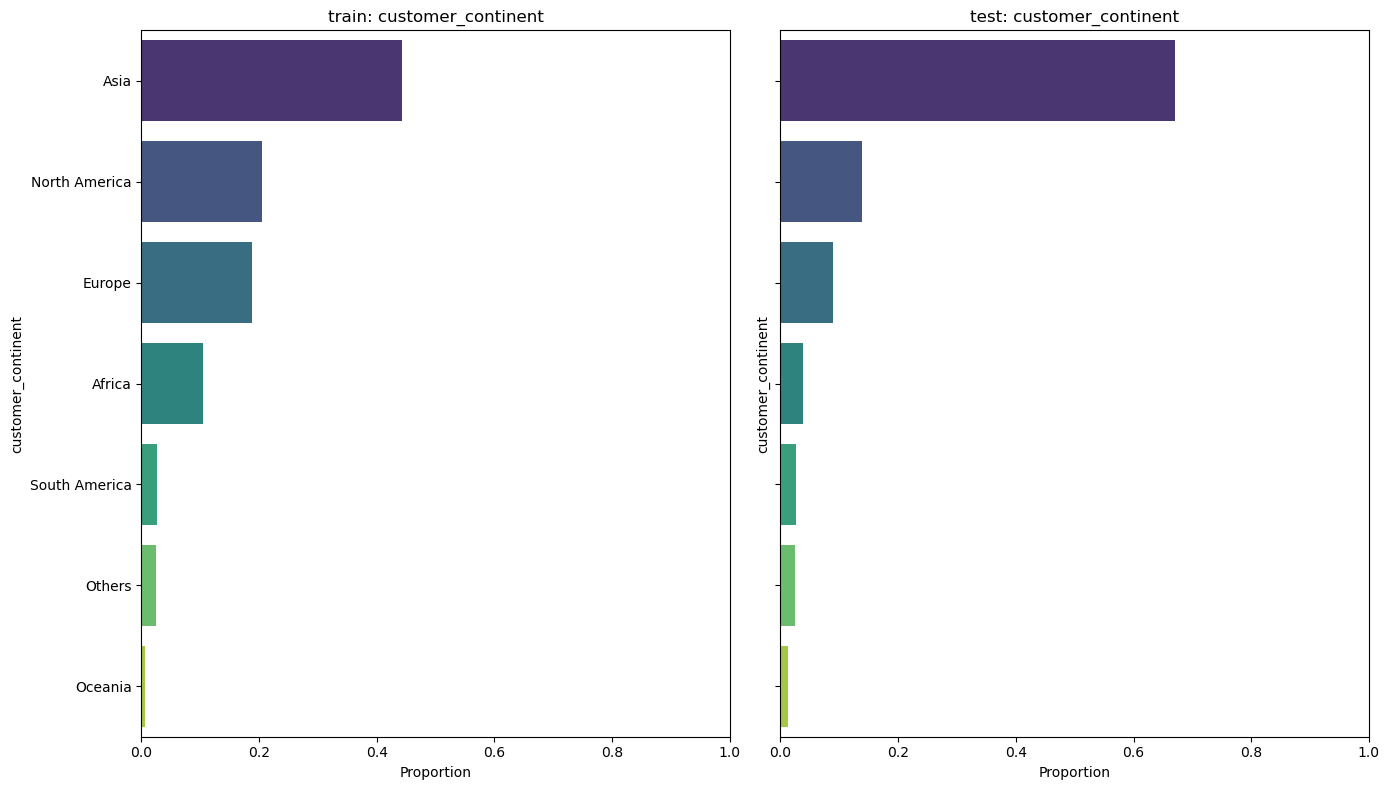

In [49]:
plot_categorical_distribution(train, test, "customer_continent")

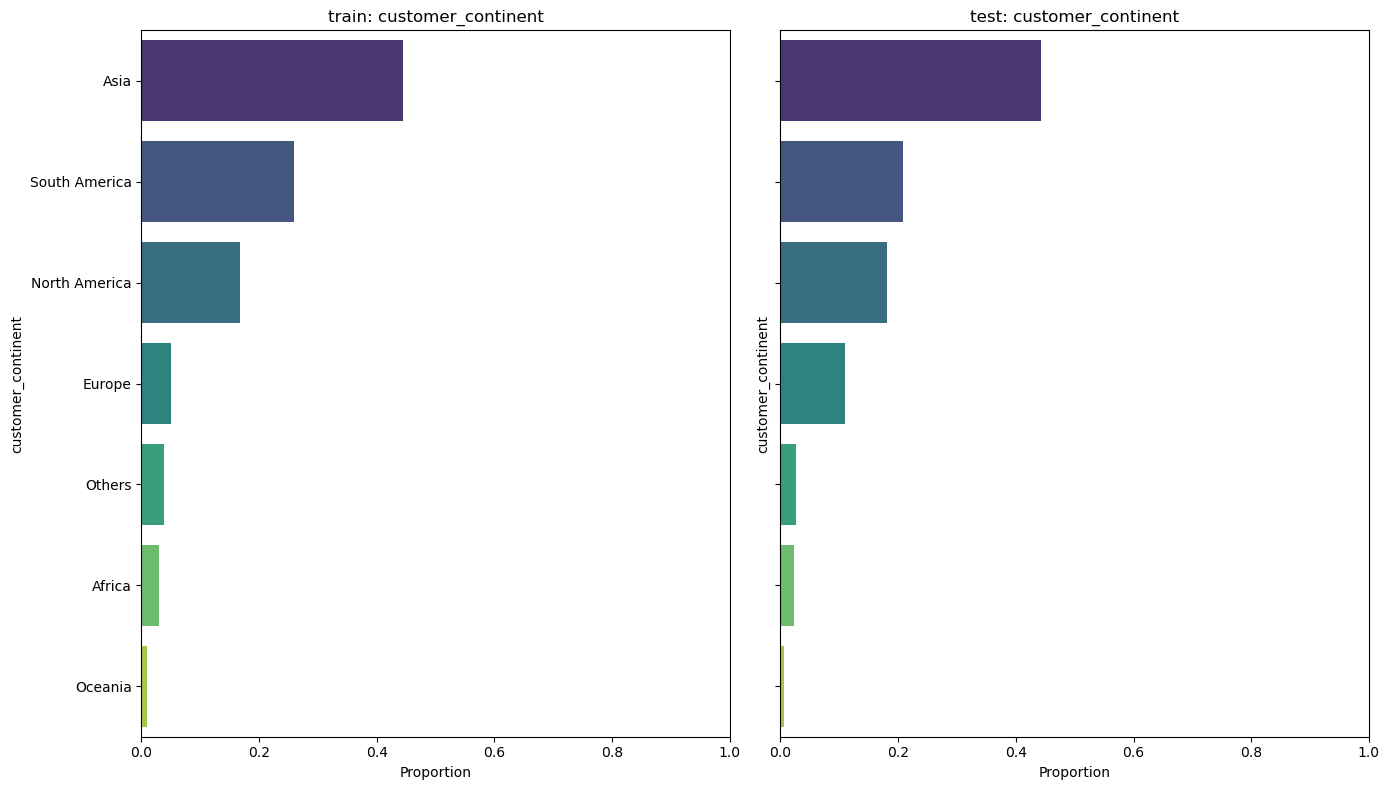

In [50]:
plot_categorical_distribution(train1,train0, "customer_continent")

## inquiry_category

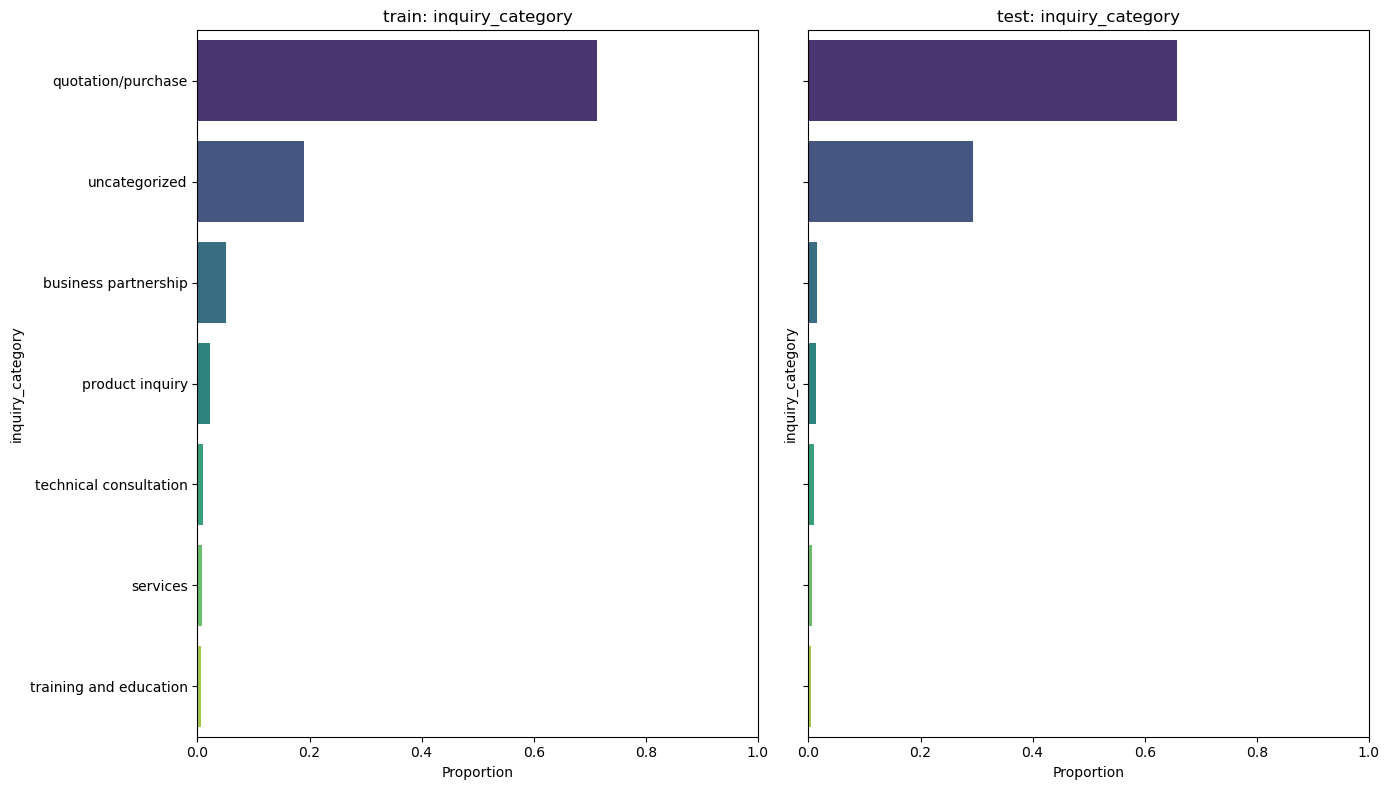

In [51]:
plot_categorical_distribution(train, test, "inquiry_category")

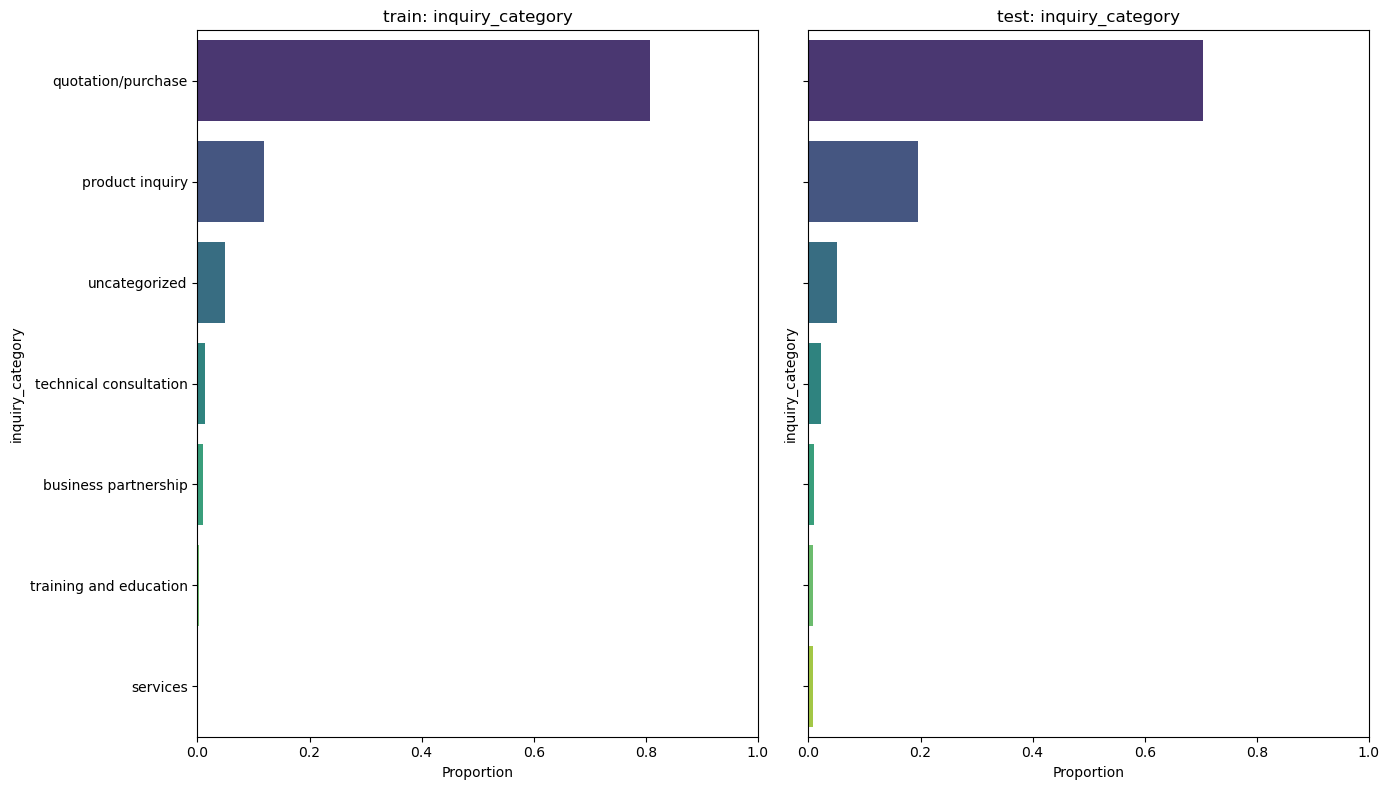

In [52]:
plot_categorical_distribution(train1,train0, "inquiry_category")

In [95]:
test["inquiry_category"].value_counts()

inquiry_category
quotation/purchase        3465
uncategorized             1549
business partnership        80
product inquiry             70
technical consultation      52
services                    34
training and education      21
Name: count, dtype: int64

In [93]:
train1["inquiry_category"].value_counts()

inquiry_category
quotation/purchase        3915
product inquiry            575
uncategorized              237
technical consultation      67
business partnership        44
services                    10
training and education       2
Name: count, dtype: int64

In [94]:
train0["inquiry_category"].value_counts()

inquiry_category
quotation/purchase        38364
product inquiry           10672
uncategorized              2802
technical consultation     1225
business partnership        530
training and education      445
services                    411
Name: count, dtype: int64

## business_unit_converted_rate 

In [53]:
train1["business_unit_converted_rate"]=round(train1["business_unit_converted_rate"],2)
test1["business_unit_converted_rate"]=round(test1["business_unit_converted_rate"],2)

In [54]:
#plot_categorical_distribution(train, test, "business_unit_converted_rate")

## customer_position_converted_rate 

In [55]:
train1["customer_position_converted_rate"]=round(train1["customer_position_converted_rate"],2)
test1["customer_position_converted_rate"]=round(test1["customer_position_converted_rate"],2)

In [56]:
#plot_categorical_distribution(train, test, "customer_position_converted_rate")

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_kde_distribution(df1, df2, variable_name):

    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.kdeplot(df1[variable_name], fill=True)
    plt.title(f'{variable_name}')
    plt.xlabel(variable_name)
    plt.ylabel('Density')

    plt.subplot(1, 2, 2)
    sns.kdeplot(df2[variable_name], fill=True)
    plt.title(f'{variable_name}')
    plt.xlabel(variable_name)
    plt.ylabel('Density')

    
    # To dynamically adjust y-axis, we first plot and then extract the maximum y-value among both plots
    y_max = max(sns.kdeplot(df1[variable_name], fill=True).get_lines()[0].get_data()[1].max(),
                sns.kdeplot(df2[variable_name], fill=True).get_lines()[0].get_data()[1].max())
    plt.ylim(0, y_max)
    plt.xlim(-0.2, 2)
    plt.tight_layout()
    plt.show()

# 확인필요!

## com_reg_ver_win_rate

IndexError: list index out of range

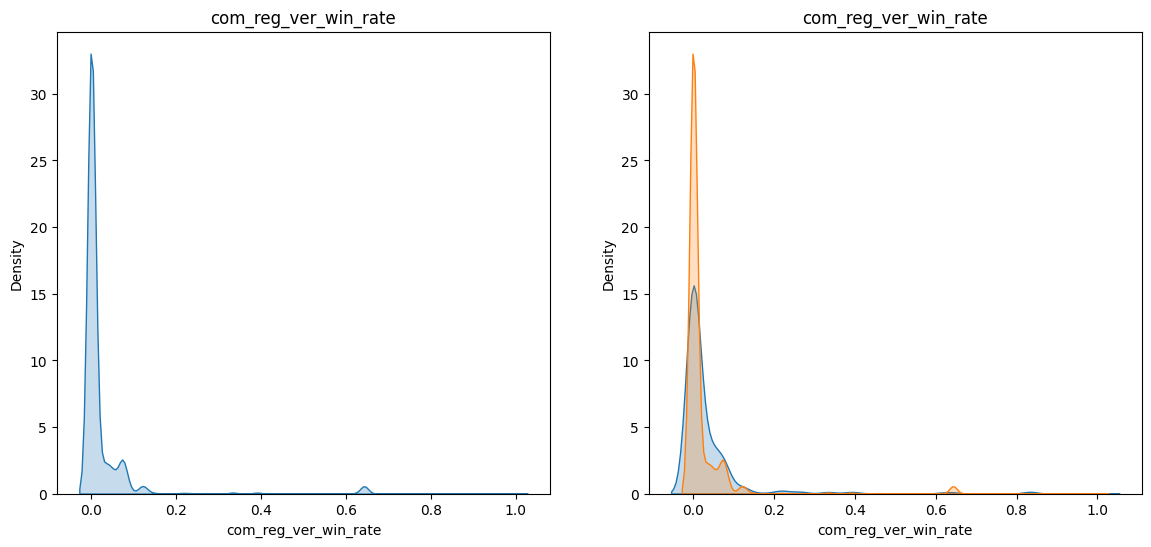

In [21]:
plot_kde_distribution(train, test, "com_reg_ver_win_rate")   #파란색은 왼쪽 밀도인가?

IndexError: list index out of range

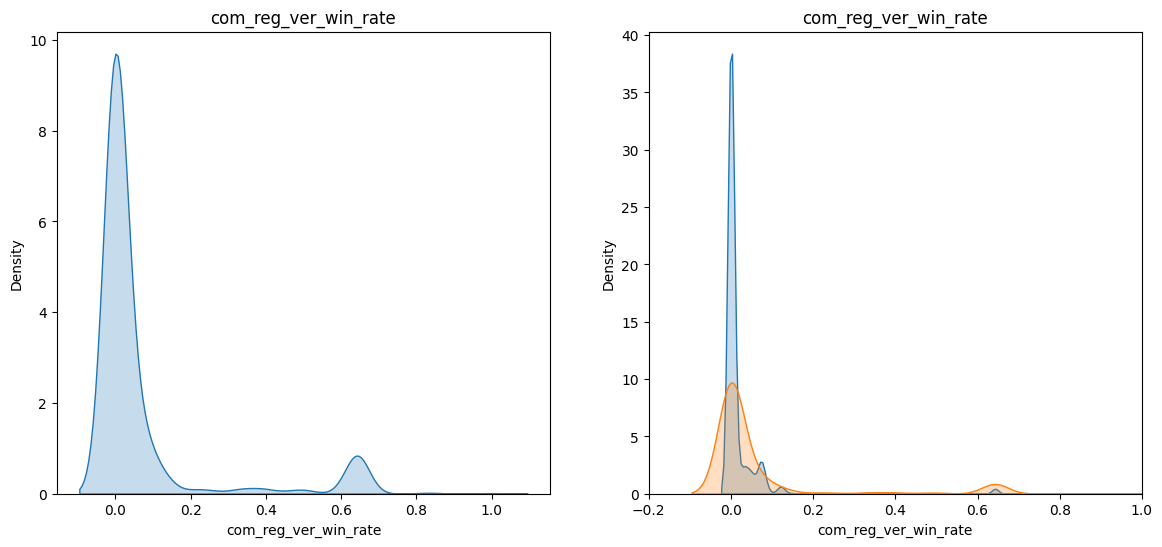

In [10]:
plot_kde_distribution(train1,train0, "com_reg_ver_win_rate") 

## lead_desc_length

IndexError: list index out of range

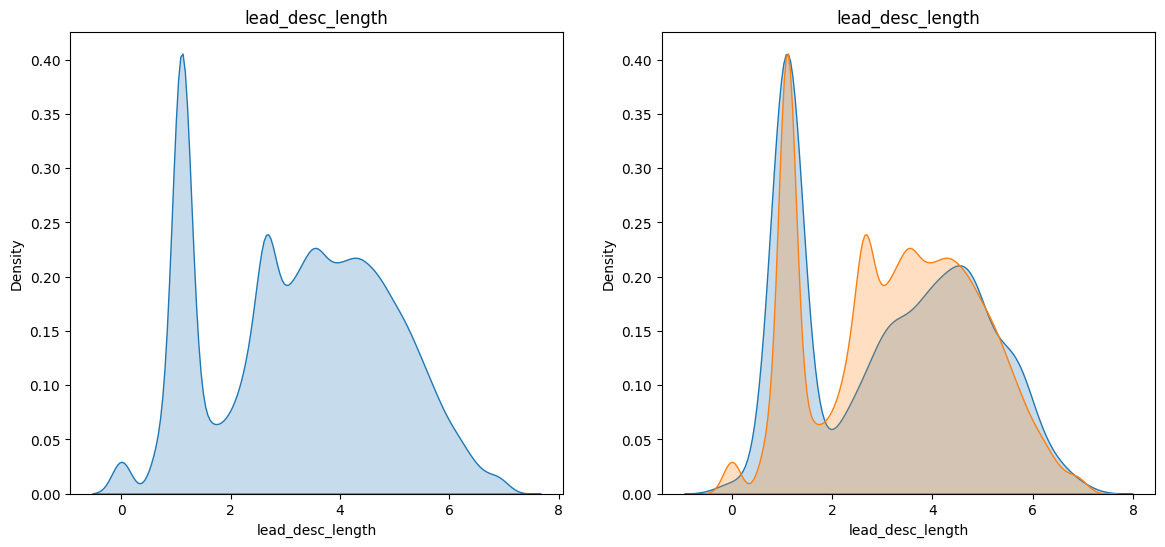

In [23]:
plot_kde_distribution(train, test, "lead_desc_length")

IndexError: list index out of range

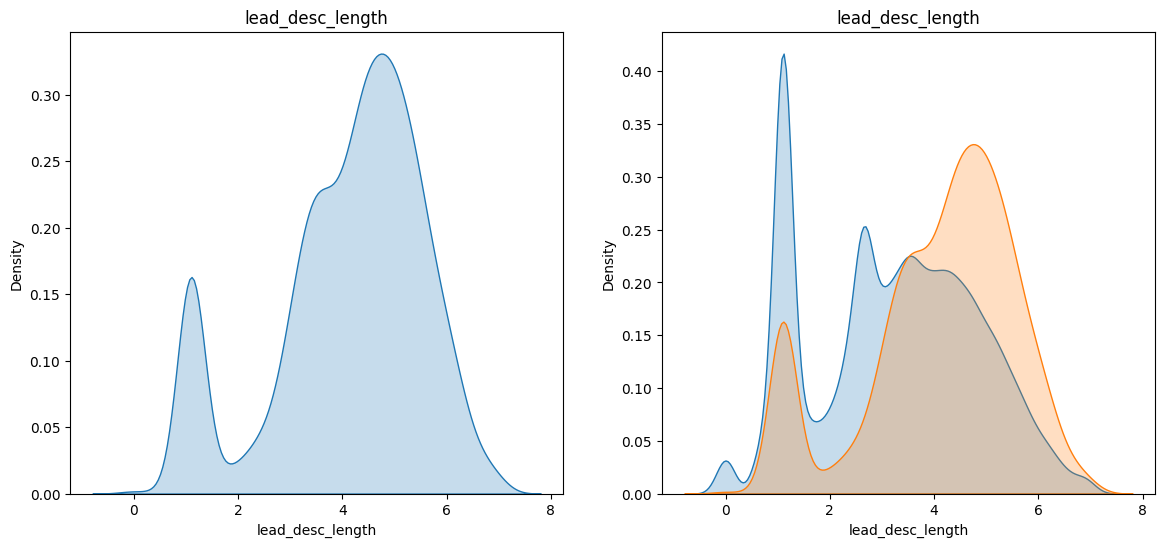

In [24]:
plot_kde_distribution(train1,train0, "lead_desc_length")

In [15]:
#test0.shape, test1.shape

## 확인 필요!

## ver_win_rate_x

IndexError: list index out of range

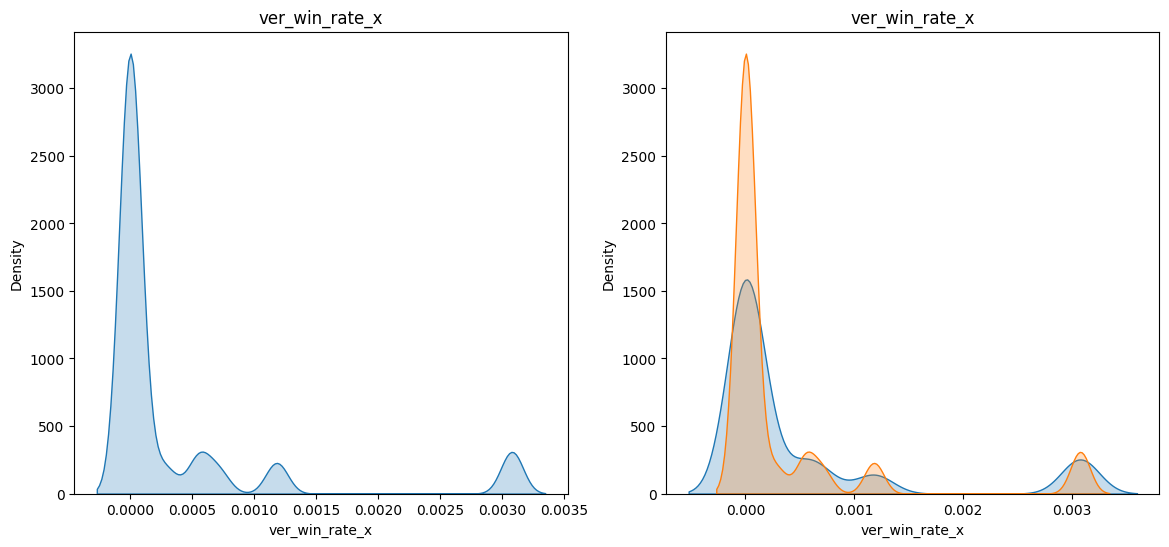

In [25]:
plot_kde_distribution(train, test, "ver_win_rate_x")

IndexError: list index out of range

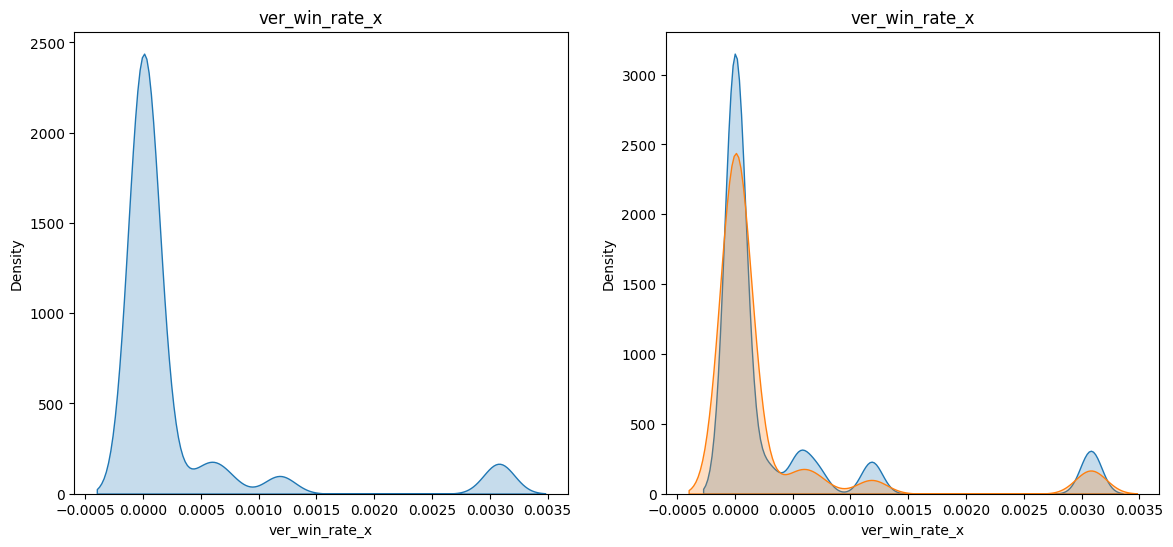

In [26]:
plot_kde_distribution(train1,train0, "ver_win_rate_x")

# 확인 필요!

## ver_win_ratio_per_bu

IndexError: list index out of range

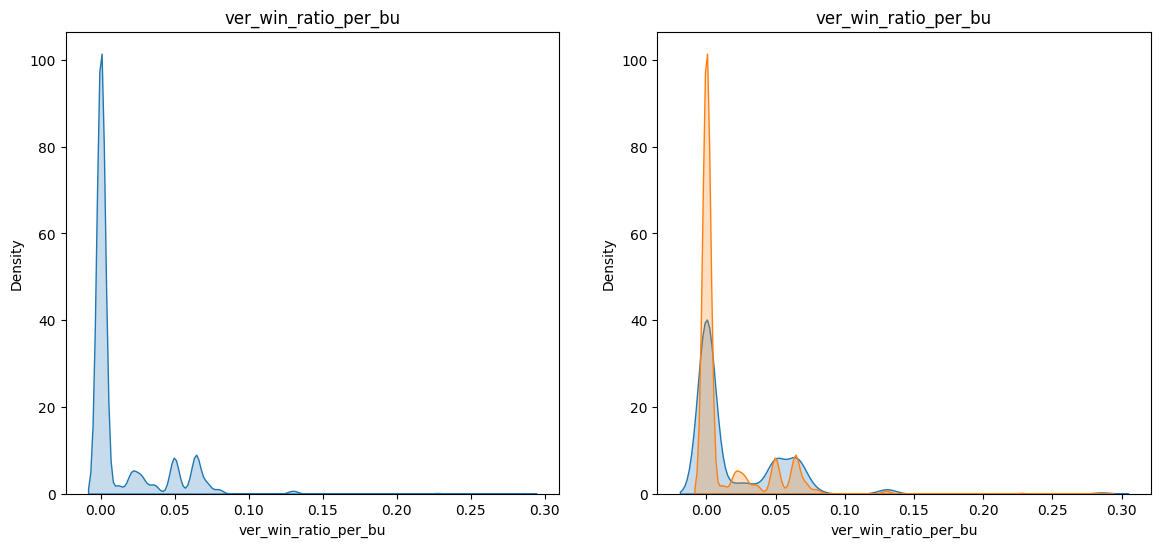

In [27]:
plot_kde_distribution(train, test, "ver_win_ratio_per_bu")

IndexError: list index out of range

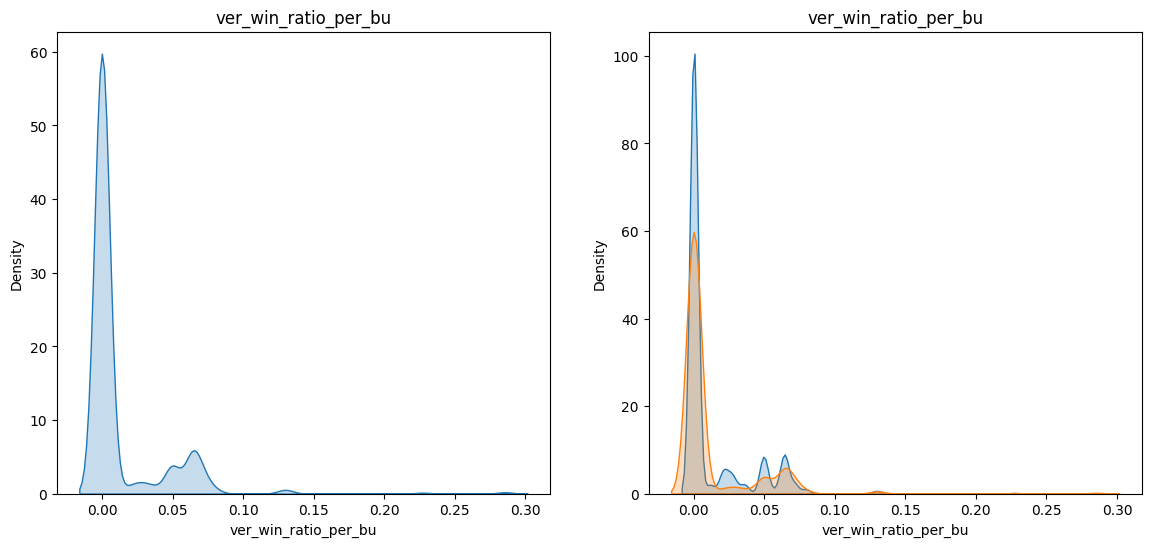

In [28]:
plot_kde_distribution(train1,train0, "ver_win_ratio_per_bu")

In [29]:
def print_value_counts(df1, df2, variable_name):
    """
    Prints the value counts of a specified variable from two DataFrames.
    """
    print(f"Value counts for {variable_name} in DataFrame 1:")
    print(df1[variable_name].value_counts().nlargest(20))  # Top 20 counts
    print("\nLeast 5 counts:")
    print(df1[variable_name].value_counts().nsmallest(5))  # Least 5 counts

    print("\n" + "-"*50 + "\n")

    print(f"Value counts for {variable_name} in DataFrame 2:")
    print(df2[variable_name].value_counts().nlargest(20))  # Top 20 counts
    print("\nLeast 5 counts:")
    print(df2[variable_name].value_counts().nsmallest(5))  # Least 5 counts


## customer_country

In [30]:
print_value_counts(train, test, 'customer_country')

Value counts for customer_country in DataFrame 1:
India                   17016
Brazil                   8781
United States            5216
Mexico                   2767
Philippines              2633
Colombia                 1992
United Arab Emirates     1621
Others                   1611
United Kingdom           1515
Saudi Arabia             1486
Chile                    1228
Italy                    1150
Peru                     1139
Germany                   900
Poland                    841
Egypt                     636
Vietnam                   607
Spain                     576
Türkiye                   545
Argentina                 496
Name: customer_country, dtype: int64

Least 5 counts:
Belarus       1
Lesotho       1
Montenegro    1
Eswatini      1
Mauritania    1
Name: customer_country, dtype: int64

--------------------------------------------------

Value counts for customer_country in DataFrame 2:
India                   2773
United States            524
United Kingdom    

In [31]:
print_value_counts(train1,train0, 'customer_country')

Value counts for customer_country in DataFrame 1:
India                   1222
United States            933
Brazil                   565
Philippines              236
United Arab Emirates     220
Hong Kong                157
Mexico                   157
Others                   142
Saudi Arabia             115
Argentina                 88
Chile                     87
Nigeria                   84
Colombia                  70
Poland                    59
Australia                 47
Germany                   46
Peru                      45
Indonesia                 36
Panama                    31
Singapore                 26
Name: customer_country, dtype: int64

Least 5 counts:
Saint Martin    1
Nicaragua       1
Namibia         1
Benin           1
Curaçao         1
Name: customer_country, dtype: int64

--------------------------------------------------

Value counts for customer_country in DataFrame 2:
India                   15794
Brazil                   8216
United States            4

In [101]:
#train0[train0["customer_country"]=="Hong Kong"]

## customer_idx

In [102]:
print_value_counts(train, test, 'customer_idx')

Value counts for customer_idx in DataFrame 1:
customer_idx
47466    7686
25096    2421
37680     367
18030     331
21321     162
33350     135
43395      91
25309      90
33763      88
32240      84
37654      76
31864      71
37657      67
19804      65
29370      61
40344      59
21389      51
7195       50
37399      45
42067      43
Name: count, dtype: int64

Least 5 counts:
customer_idx
39337    1
43329    1
27341    1
2017     1
20422    1
Name: count, dtype: int64

--------------------------------------------------

Value counts for customer_idx in DataFrame 2:
customer_idx
47466    363
9324     120
23341     31
26303     14
37680     14
11685     13
21321     11
869       10
28290     10
35824      9
22433      9
918        9
21156      9
46211      9
4936       9
32240      7
46022      7
20424      7
27090      7
25940      7
Name: count, dtype: int64

Least 5 counts:
customer_idx
13151    1
11056    1
23165    1
34532    1
7970     1
Name: count, dtype: int64


In [71]:
print_value_counts(train1,train0, 'customer_idx')

Value counts for customer_idx in DataFrame 1:
customer_idx
25096    2421
47466      67
14746      38
42108      19
7740       17
45319      15
9324       14
26337      13
5023       11
9857       11
27735      10
8582       10
19251       8
19252       8
10350       7
11515       7
5763        6
14141       6
13440       6
13580       6
Name: count, dtype: int64

Least 5 counts:
customer_idx
18786    1
13563    1
13507    1
19114    1
39782    1
Name: count, dtype: int64

--------------------------------------------------

Value counts for customer_idx in DataFrame 2:
customer_idx
47466    7619
37680     363
18030     330
21321     161
33350     135
43395      91
25309      90
33763      88
32240      83
37654      76
31864      71
37657      65
19804      64
29370      61
40344      58
7195       50
21389      50
42067      43
37399      43
33776      33
Name: count, dtype: int64

Least 5 counts:
customer_idx
38731    1
24583    1
25806    1
45636    1
29944    1
Name: count, dtype: i

In [138]:
#test[test["customer_idx"]==7195]

In [139]:
#train1[train1["customer_idx"]==7195]

## customer_position

In [141]:
print_value_counts(train, test, 'customer_position')

Value counts for customer_position in DataFrame 1:
customer_position
none                          19693
manager                        8217
founder                        7990
other                          7471
director                       4847
associate/analyst              2597
partner                        2538
entry level                    2219
intern                         1295
c-level executive               857
vice president                  521
end-user                        431
hospital                        202
installer                        60
manufacturer                     34
government                       29
cargo                            27
consultant                       26
software/solution provider       25
teacher                          21
Name: count, dtype: int64

Least 5 counts:
customer_position
distributor        1
developer          1
market research    1
veterinarian       1
pathologist        1
Name: count, dtype: int64

------------------

In [73]:
print_value_counts(train1,train0, 'customer_position')

Value counts for customer_position in DataFrame 1:
customer_position
none                    1655
manager                  826
founder                  659
director                 433
other                    431
associate/analyst        325
partner                  232
entry level               98
c-level executive         74
vice president            44
intern                    43
decision-maker             6
decision-influencer        5
unpaid                     4
customer                   3
consultant                 2
architecture/consult       2
faculty                    2
teacher                    2
employee                   1
Name: count, dtype: int64

Least 5 counts:
customer_position
employee       1
engineering    1
homeowner      1
president      1
consultant     2
Name: count, dtype: int64

--------------------------------------------------

Value counts for customer_position in DataFrame 2:
customer_position
none                          18038
manager              

In [146]:
#test[test["customer_position"]=="entry level"]

In [147]:
#train1[train1["customer_position"]=="end-user"]

## response_corporate

In [74]:
print_value_counts(train, test, 'response_corporate')

Value counts for response_corporate in DataFrame 1:
response_corporate
LGEIL    16908
LGESP     9311
LGEUS     5955
LGEMS     2768
LGEPH     2651
LGEGF     2149
LGECB     2079
LGEUK     1651
LGESJ     1469
LGECL     1339
LGEPS     1252
LGEIS     1146
LGEPR     1131
LGEDG     1051
LGEPL      850
LGEEG      704
LGEVH      614
LGEES      592
LGETK      541
LGEAR      491
Name: count, dtype: int64

Least 5 counts:
response_corporate
LGEUR    1
LGEIR    1
LGEBT    1
LGELA    2
LGECZ    7
Name: count, dtype: int64

--------------------------------------------------

Value counts for response_corporate in DataFrame 2:
response_corporate
LGESP    1045
LGEUS    1009
LGEIL     907
LGEPH     289
LGEPR     212
LGEMS     181
LGEGF     151
LGECB     126
LGEIS     123
LGECL     110
LGESJ     102
LGEEG      96
LGEIN      96
LGEPS      94
LGEDG      73
LGEVH      70
LGEAR      65
LGEAP      64
LGETK      51
LGEHK      48
Name: count, dtype: int64

Least 5 counts:
response_corporate
LGEYK    1
LGEAG    

In [75]:
print_value_counts(train1,train0, 'response_corporate')

Value counts for response_corporate in DataFrame 1:
response_corporate
LGEIL    1206
LGEUS     959
LGESP     671
LGEGF     268
LGEPH     237
LGEHK     159
LGEMS     155
LGEAF     131
LGESJ     116
LGECL      96
LGEPS      92
LGEAR      85
LGECB      74
LGEPL      60
LGEDG      52
LGEAP      47
LGEPR      44
LGEIN      39
LGETH      33
LGESL      31
Name: count, dtype: int64

Least 5 counts:
response_corporate
LGELA    1
LGEAS    1
LGEEB    1
LGECH    2
LGEKR    2
Name: count, dtype: int64

--------------------------------------------------

Value counts for response_corporate in DataFrame 2:
response_corporate
LGEIL    15702
LGESP     8640
LGEUS     4996
LGEMS     2613
LGEPH     2414
LGECB     2005
LGEGF     1881
LGEUK     1626
LGESJ     1353
LGECL     1243
LGEPS     1160
LGEIS     1137
LGEPR     1087
LGEDG      999
LGEPL      790
LGEEG      688
LGEVH      601
LGEES      577
LGETK      529
LGEKR      431
Name: count, dtype: int64

Least 5 counts:
response_corporate
LGEUR    1
LGELA    

In [152]:
train1[train1["response_corporate"]=="LGESP"]

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,id_strategic_ver,it_strategic_ver,idit_strategic_ver,...,lead_owner,is_converted,customer_continent,customer_converted_rate,customer_type_category,customer_position_converted_rate,business_unit_converted_rate,response_corporate_converted_rate,lead_owner_converted_rate,inquiry_category
419,0.75,Brazil,ID,0.074949,10309,End-Customer,SMB,1.0,0.0,1.0,...,167,True,South America,1.0,End-User,0.10,0.10,0.072065,0.148148,quotation/purchase
1550,1.0,Brazil,ID,0.074949,25756,Specifier/Influencer,SMB,1.0,0.0,1.0,...,167,True,South America,1.0,Specifier/Influencer,0.09,0.10,0.072065,0.148148,business partnership
1551,1.0,Brazil,ID,0.074949,25756,Specifier/Influencer,SMB,1.0,0.0,1.0,...,167,True,South America,1.0,Specifier/Influencer,0.09,0.10,0.072065,0.148148,business partnership
1819,1.0,Brazil,ID,0.000000,25096,Others,SMB,0.0,0.0,0.0,...,167,True,South America,1.0,Others,0.13,0.10,0.072065,0.148148,quotation/purchase
2232,0.75,Brazil,ID,0.000000,25096,Others,SMB,0.0,0.0,0.0,...,480,True,South America,1.0,Others,0.10,0.10,0.072065,0.671233,uncategorized
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59142,1.0,Brazil,ID,0.042254,41466,End-Customer,SMB,0.0,0.0,0.0,...,342,True,South America,0.5,End-User,0.06,0.10,0.072065,0.176301,quotation/purchase
59143,1.0,Brazil,ID,0.042254,1410,End-Customer,Enterprise,0.0,0.0,0.0,...,480,True,South America,1.0,End-User,0.06,0.10,0.072065,0.671233,quotation/purchase
59162,1.0,Brazil,AS,0.040000,30765,End-Customer,Enterprise,0.0,0.0,0.0,...,488,True,South America,1.0,End-User,0.10,0.06,0.072065,0.246753,quotation/purchase
59163,1.0,Brazil,AS,0.040000,19121,End-Customer,Enterprise,0.0,0.0,0.0,...,621,True,South America,1.0,End-User,0.09,0.06,0.072065,0.772727,quotation/purchase


## customer_type

In [76]:
print_value_counts(train, test, 'customer_type')

Value counts for customer_type in DataFrame 1:
customer_type
Others                        43981
End-Customer                  10643
Specifier/Influencer           2568
Channel Partner                1368
Service Partner                 349
Solution Eco-Partner            146
Installer/Contractor             52
Corporate                        31
HVAC Engineer                    23
Engineer                         20
Developer                        17
Technician                       16
Consultant                       15
Home Owner                       15
Software/Solution Provider        8
Manager/Director                  8
End-User                          8
Architect/Consultant              5
Installer                         5
Interior Designer                 5
Name: count, dtype: int64

Least 5 counts:
customer_type
Technical Assistant    1
Commercial End-User    1
Administrator          1
Dealer/Distributor     2
System Integrator      2
Name: count, dtype: int64

----------

In [77]:
print_value_counts(train1,train0, 'customer_type')

Value counts for customer_type in DataFrame 1:
customer_type
Others                  2898
End-Customer            1468
Specifier/Influencer     204
Channel Partner          166
Service Partner           49
Solution Eco-Partner      43
Consultant                11
Installer                  5
Home Owner                 3
Architect/Consultant       2
Installer/Contractor       1
Name: count, dtype: int64

Least 5 counts:
customer_type
Installer/Contractor     1
Architect/Consultant     2
Home Owner               3
Installer                5
Consultant              11
Name: count, dtype: int64

--------------------------------------------------

Value counts for customer_type in DataFrame 2:
customer_type
Others                        41083
End-Customer                   9175
Specifier/Influencer           2364
Channel Partner                1202
Service Partner                 300
Solution Eco-Partner            103
Installer/Contractor             51
Corporate                        31


## lead_owner

In [78]:
print_value_counts(train, test, 'lead_owner')      

Value counts for lead_owner in DataFrame 1:
lead_owner
174    4627
175    4120
97     2499
23     2453
194    2208
42     1215
96      981
185     880
363     839
115     734
38      693
125     690
402     490
108     487
124     468
816     464
341     462
167     459
100     457
0       429
Name: count, dtype: int64

Least 5 counts:
lead_owner
1099    1
1101    1
686     1
693     1
688     1
Name: count, dtype: int64

--------------------------------------------------

Value counts for lead_owner in DataFrame 2:
lead_owner
97     688
174    357
258    184
375    134
194    131
374    129
341     96
731     87
42      84
278     82
437     76
209     72
654     70
728     64
51      64
325     53
46      52
189     52
572     51
435     49
Name: count, dtype: int64

Least 5 counts:
lead_owner
850    1
347    1
66     1
617    1
815    1
Name: count, dtype: int64


In [79]:
print_value_counts(train1,train0, 'lead_owner')

Value counts for lead_owner in DataFrame 1:
lead_owner
437    135
487    117
831    104
480     98
375     88
589     77
166     75
68      74
279     72
167     68
833     66
342     61
4       60
570     59
153     59
155     53
183     52
147     51
148     50
100     49
Name: count, dtype: int64

Least 5 counts:
lead_owner
1040    1
370     1
1098    1
926     1
1041    1
Name: count, dtype: int64

--------------------------------------------------

Value counts for lead_owner in DataFrame 2:
lead_owner
174    4582
175    4120
97     2499
23     2422
194    2208
42     1212
96      981
185     872
363     839
115     718
38      693
125     690
402     490
108     485
124     465
816     464
341     462
0       409
100     408
167     391
Name: count, dtype: int64

Least 5 counts:
lead_owner
1065    1
756     1
693     1
690     1
813     1
Name: count, dtype: int64


In [211]:
test[test["lead_owner"]==100]

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,id_strategic_ver,it_strategic_ver,idit_strategic_ver,...,lead_owner,is_converted,customer_continent,customer_converted_rate,customer_type_category,customer_position_converted_rate,business_unit_converted_rate,response_corporate_converted_rate,lead_owner_converted_rate,inquiry_category
1195,0.75,Saudi Arabia,AS,0.0,10614,Others,Enterprise,0.0,0.0,0.0,...,100,False,Asia,0.0,Others,0.057690,0.055825,0.071695,0.107221,uncategorized
2066,0.75,Morocco,AS,0.0,17096,Others,SMB,0.0,0.0,0.0,...,100,False,Africa,0.0,Others,0.057690,0.055825,0.071695,0.107221,uncategorized
2160,0.75,India,AS,0.0,9069,Others,Enterprise,0.0,0.0,0.0,...,100,False,Asia,0.0,Others,0.125144,0.055825,0.071695,0.107221,uncategorized
3152,0.75,United States,AS,0.0,19927,Specifier/Influencer,Enterprise,0.0,0.0,0.0,...,100,False,North America,0.0,Specifier/Influencer,0.057690,0.055825,0.071695,0.107221,uncategorized
4027,0.75,India,AS,0.0,10930,Specifier/Influencer,Enterprise,0.0,0.0,0.0,...,100,False,Asia,0.0,Specifier/Influencer,0.033205,0.055825,0.071695,0.107221,uncategorized
5006,0.75,India,AS,0.0,2948,Specifier/Influencer,Enterprise,0.0,0.0,0.0,...,100,False,Asia,0.0,Specifier/Influencer,0.057690,0.055825,0.071695,0.107221,uncategorized


In [212]:
train1[train1["lead_owner"]==100]

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,id_strategic_ver,it_strategic_ver,idit_strategic_ver,...,lead_owner,is_converted,customer_continent,customer_converted_rate,customer_type_category,customer_position_converted_rate,business_unit_converted_rate,response_corporate_converted_rate,lead_owner_converted_rate,inquiry_category
14050,0.25,Bolivia,AS,0.0,25096,Others,SMB,0.0,0.0,0.0,...,100,True,South America,1.000000,Others,0.08,0.06,0.071695,0.107221,quotation/purchase
35601,1.0,Uruguay,AS,0.0,25096,Others,SMB,0.0,0.0,0.0,...,100,True,South America,1.000000,Others,0.08,0.06,0.071695,0.107221,product inquiry
35609,1.0,Chile,AS,0.0,25096,Others,SMB,0.0,0.0,0.0,...,100,True,South America,1.000000,Others,0.08,0.06,0.071695,0.107221,quotation/purchase
35611,1.0,Chile,AS,0.0,25096,Others,SMB,0.0,0.0,0.0,...,100,True,South America,1.000000,Others,0.06,0.06,0.071695,0.107221,quotation/purchase
35640,1.0,Chile,AS,0.0,25096,Others,SMB,0.0,0.0,0.0,...,100,True,South America,1.000000,Others,0.08,0.06,0.071695,0.107221,product inquiry
35641,1.0,Chile,AS,0.0,25096,Others,SMB,0.0,0.0,0.0,...,100,True,South America,1.000000,Others,0.08,0.06,0.071695,0.107221,product inquiry
35643,1.0,Chile,AS,0.0,25096,Others,SMB,0.0,0.0,0.0,...,100,True,South America,1.000000,Others,0.10,0.06,0.071695,0.107221,quotation/purchase
35644,1.0,Chile,AS,0.0,25096,Others,Enterprise,0.0,0.0,0.0,...,100,True,South America,1.000000,Others,0.13,0.06,0.071695,0.107221,product inquiry
35645,1.0,Chile,AS,0.0,25096,Others,Enterprise,0.0,0.0,0.0,...,100,True,South America,1.000000,Others,0.06,0.06,0.071695,0.107221,quotation/purchase
35646,1.0,Chile,AS,0.0,25096,Others,SMB,0.0,0.0,0.0,...,100,True,South America,1.000000,Others,0.06,0.06,0.071695,0.107221,quotation/purchase


In [213]:
train0[train0["lead_owner"]==100]

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,id_strategic_ver,it_strategic_ver,idit_strategic_ver,...,lead_owner,is_converted,customer_continent,customer_converted_rate,customer_type_category,customer_position_converted_rate,business_unit_converted_rate,response_corporate_converted_rate,lead_owner_converted_rate,inquiry_category
262,0.5,Chile,AS,0.003937,38616,Others,SMB,0.0,0.0,0.0,...,100,False,South America,0.0,Others,0.100523,0.055825,0.071695,0.107221,product inquiry
263,0.5,Chile,AS,0.003937,33683,Others,SMB,0.0,0.0,0.0,...,100,False,South America,0.0,Others,0.100523,0.055825,0.071695,0.107221,product inquiry
264,0.5,Chile,AS,0.003937,10607,Others,SMB,0.0,0.0,0.0,...,100,False,South America,0.0,Others,0.057690,0.055825,0.071695,0.107221,product inquiry
265,0.5,Chile,AS,0.003937,10607,Others,SMB,0.0,0.0,0.0,...,100,False,South America,0.0,Others,0.057690,0.055825,0.071695,0.107221,product inquiry
14168,0.75,Chile,AS,0.000000,21675,Others,SMB,0.0,0.0,0.0,...,100,False,South America,0.0,Others,0.000000,0.055825,0.071695,0.107221,training and education
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58869,0.75,Chile,AS,0.000000,29105,End-Customer,SMB,0.0,0.0,0.0,...,100,False,South America,0.0,End-User,0.057690,0.055825,0.071695,0.107221,uncategorized
58872,0.75,Chile,AS,0.000000,29105,End-Customer,SMB,0.0,0.0,0.0,...,100,False,South America,0.0,End-User,0.057690,0.055825,0.071695,0.107221,uncategorized
59253,0.5,Chile,AS,0.040000,20702,Others,SMB,0.0,0.0,0.0,...,100,False,South America,0.0,Others,0.082478,0.055825,0.071695,0.107221,product inquiry
59274,1.0,Chile,AS,0.040000,22100,Specifier/Influencer,Enterprise,0.0,0.0,0.0,...,100,False,South America,0.0,Specifier/Influencer,0.100523,0.055825,0.071695,0.107221,quotation/purchase
